## Business Problem

My task is to analyze the time series data of the adjusted close price of Raymond James Financial, using various exponential smoothing techniques such as single and double exponential smoothing, and the Holt-Winters method, to identify potential future trends and forecast potential business problems or opportunities. This analysis will assist the company in making data-driven decisions to optimize its financial performance.

## Data Collection

In the case of analyzing publicly traded stock market data, data privacy techniques are not necessary as the data is already publicly available and can be freely accessed and analyzed by anyone.

Link to Dataset: https://finance.yahoo.com/quote/RJF/history?period1=1523491200&period2=1681171200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true  (filter Time Period to Apr 11, 2018 - Apr 10, 2023)

The dataset provided contains daily stock market data for a particular stock for a time period of five years from April 12, 2018, to April 04, 2023. The dataset includes the following fields:

Date: The date of the stock market data.

Open: The opening price of the stock for that particular day.

High: The highest price of the stock for that particular day.

Low: The lowest price of the stock for that particular day.

Close: The closing price of the stock for that particular day.

Adj Close: The adjusted closing price of the stock for that particular day.

Volume: The volume of the stock traded for that particular day.

To begin the analysis, the year, month, and day features were extracted from the date field to facilitate data manipulation. Additionally, a new column called "Price Change" was created, which represents the difference between the closing and opening prices.

## Analysis Performed

Data import and pre-processing: The first step involves reading the CSV data file into a pandas dataframe using pd.read_csv() function. The 'Date' column is set as the index of the dataframe, and the 'Date' column is converted to a date format using the parse_dates parameter. The year, month, and day features are extracted from the index and stored in new columns 'Year', 'Month', and 'Day', respectively.

Data visualization: The adjusted close price data is plotted using the plot() function, which shows the trend in the adjusted close price of RJF over time.

Data transformation: A new column 'Daily_Price_Change' is created in the dataframe to store the difference between the closing and opening prices. The 'Daily_Price_Change' is also plotted over time using the plot() function to show the trend in price change over time. The summary statistics of the 'Daily_Price_Change' column are printed using the describe() function.

Moving average: The plotMovingAverage() function is defined to calculate and plot the rolling mean trend of the adjusted close price data. The function also shows the upper and lower confidence intervals for the smoothed values, and optionally highlights the anomalies in the data.

Exponential smoothing: The plotExponentialSmoothing() function is defined to calculate and plot the exponential smoothing trend of the adjusted close price data. The function takes a list of smoothing parameters (alphas) as input and plots the smoothed values for each alpha.

Double exponential smoothing: The double_exponential_smoothing() function is defined to calculate the double exponential smoothing of the adjusted close price data. The plotDoubleExponentialSmoothing() function is defined to plot the double exponential smoothing trend of the data for each alpha-beta combination.

Holt-Winters method: The plotHoltWinters() function is defined to calculate and plot the Holt-Winters trend of the adjusted close price data. The function also shows the upper and lower confidence intervals for the smoothed values, and optionally highlights the anomalies in the data.

## Limitations

Limited features: The dataset has only six features (Date, Open, High, Low, Close, Adj Close, Volume), which may not be sufficient to perform complex analyses or build predictive models.

Timeframe: The dataset only covers a limited timeframe from April to April 2023, which may not provide a comprehensive understanding of the stock market trends.

Missing data: There may be some missing data points in the dataset, which can impact the accuracy of the analysis.

Limited information about the company: There is no information about the company whose stocks are represented in the dataset. This can be crucial to understand the context of the stock market trends.

Outliers: The dataset may have outliers which can skew the results of the analysis.

Stationarity: There is no indication of whether the data is stationary or not. Stationarity is a critical assumption for many time-series models.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.optimize import minimize
from dateutil.relativedelta import relativedelta

In [17]:
import statsmodels.formula.api as smf 
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product
from tqdm import tqdm_notebook

In [18]:
df = pd.read_csv("RJF.csv", index_col=['Date'], parse_dates=['Date'])
df.head(5)

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-04-12  57.706669  58.619999  57.520000  58.086666  53.660126   779550
2018-04-13  58.606667  58.633331  56.773335  57.026669  52.680908  1068600
2018-04-16  57.506668  58.186668  57.333332  57.700001  53.302921  1928550
2018-04-17  58.279999  58.639999  57.599998  57.993332  53.573898  2604450
2018-04-18  58.360001  58.633331  57.580002  57.720001  53.321400   945600

In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [20]:
Adj_Close = df['Adj Close']

In [21]:
Close =df['Close']

In [22]:
Volume =df['Volume']

In [23]:
# Extract the year, month, and day features from the index
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Day"] = df.index.day

# Print the resulting dataframe
print(df.head())

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-04-12  57.706669  58.619999  57.520000  58.086666  53.660126   779550   
2018-04-13  58.606667  58.633331  56.773335  57.026669  52.680908  1068600   
2018-04-16  57.506668  58.186668  57.333332  57.700001  53.302921  1928550   
2018-04-17  58.279999  58.639999  57.599998  57.993332  53.573898  2604450   
2018-04-18  58.360001  58.633331  57.580002  57.720001  53.321400   945600   

            Year  Month  Day  
Date                          
2018-04-12  2018      4   12  
2018-04-13  2018      4   13  
2018-04-16  2018      4   16  
2018-04-17  2018      4   17  
2018-04-18  2018      4   18  


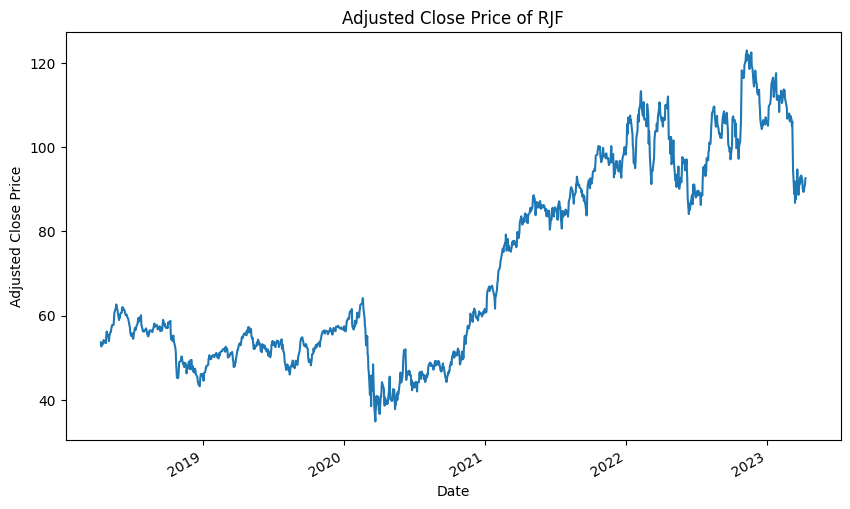

In [24]:
# Plot the adjusted close
Adj_Close.plot(figsize=(10, 6))
plt.title('Adjusted Close Price of RJF')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

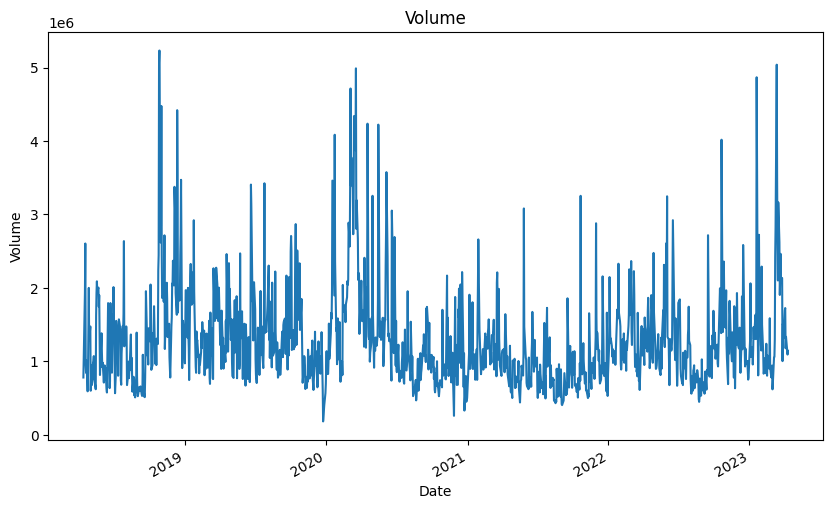

In [25]:
# Plot the adjusted close
Volume.plot(figsize=(10, 6))
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [26]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

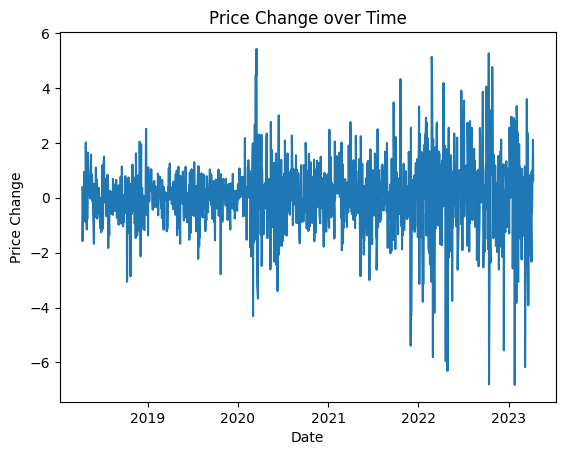

count    1258.000000
mean        0.010125
std         1.318180
min        -6.820000
25%        -0.652499
50%         0.060001
75%         0.686665
max         5.419998
Name: Daily_Price_Change, dtype: float64


In [27]:
# Create a new column called "Price Change" with the difference between the closing and opening prices
Daily_Price_Change = df['Close'] - df['Open']

# Create a new column called "Price Change" with the difference between the closing and opening prices
df['Daily_Price_Change'] = df['Close'] - df['Open']

# Create a line plot to show the price change over time
plt.plot(df.index, df['Daily_Price_Change'])
plt.title('Price Change over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()

print(df['Daily_Price_Change'].describe())

## Smoothing

In [28]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(Adj_Close, 24) # prediction for the last observed day (past 24 hours)


92.00859100000001

In [29]:
def plotMovingAverage(Adj_Close, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    """
        Adj Close - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = Adj_Close.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(Adj_Close[window:], rolling_mean[window:])
        deviation = np.std(Adj_Close[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=Adj_Close.index, columns=["Adj_Close"])
            anomalies.loc[Adj_Close < lower_bond, "Adj_Close"] = Adj_Close[Adj_Close < lower_bond]
            anomalies.loc[Adj_Close > upper_bond, "Adj_Close"] = Adj_Close[Adj_Close > upper_bond]
            plt.plot(anomalies["Adj_Close"], "ro", markersize=10)
        
    plt.plot(Adj_Close[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

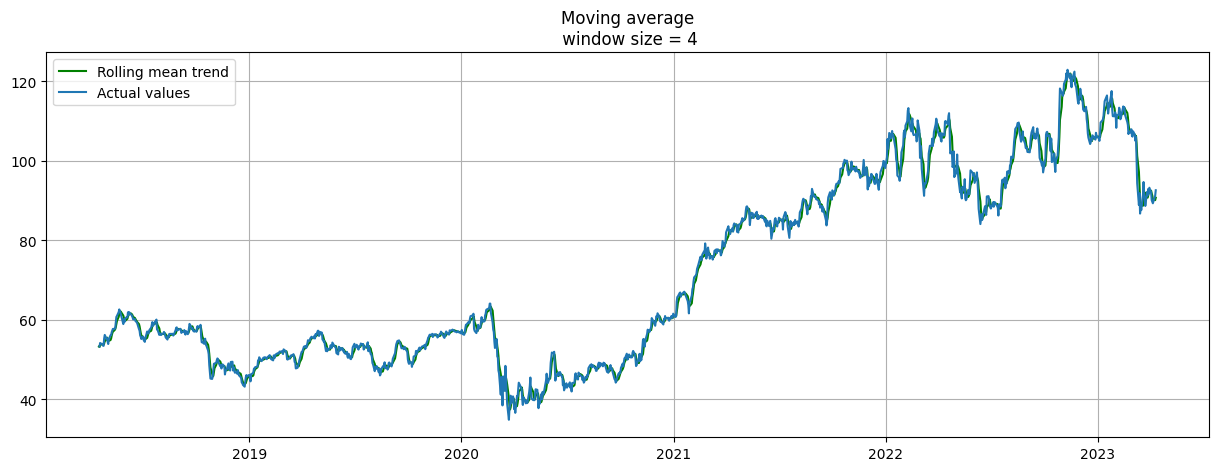

In [30]:
# Plot the moving average of the adjusted closing price with a window of 4 days
plotMovingAverage(Adj_Close, 4)

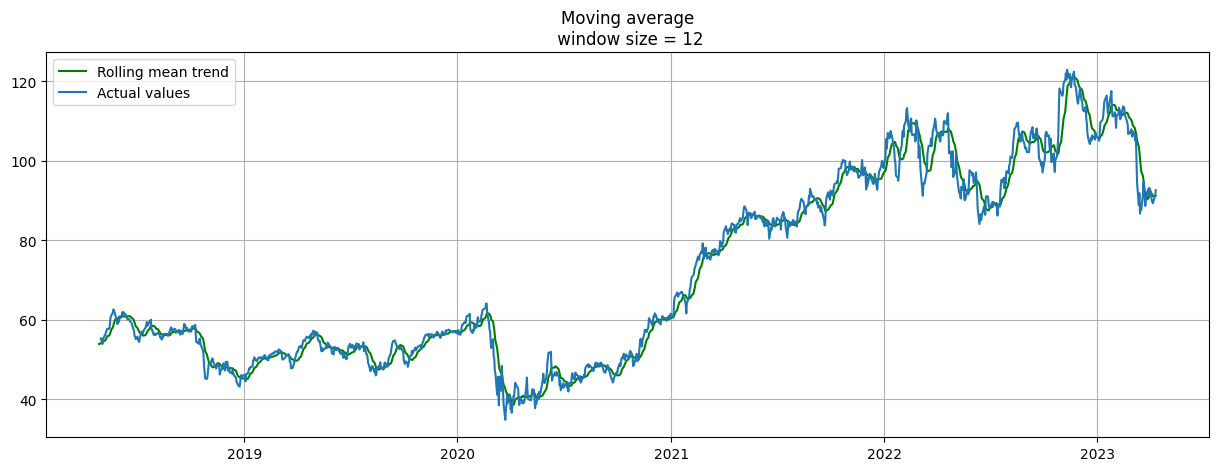

In [31]:
# Plot the moving average of the adjusted closing price with a window of 12 days
plotMovingAverage(Adj_Close, 12)

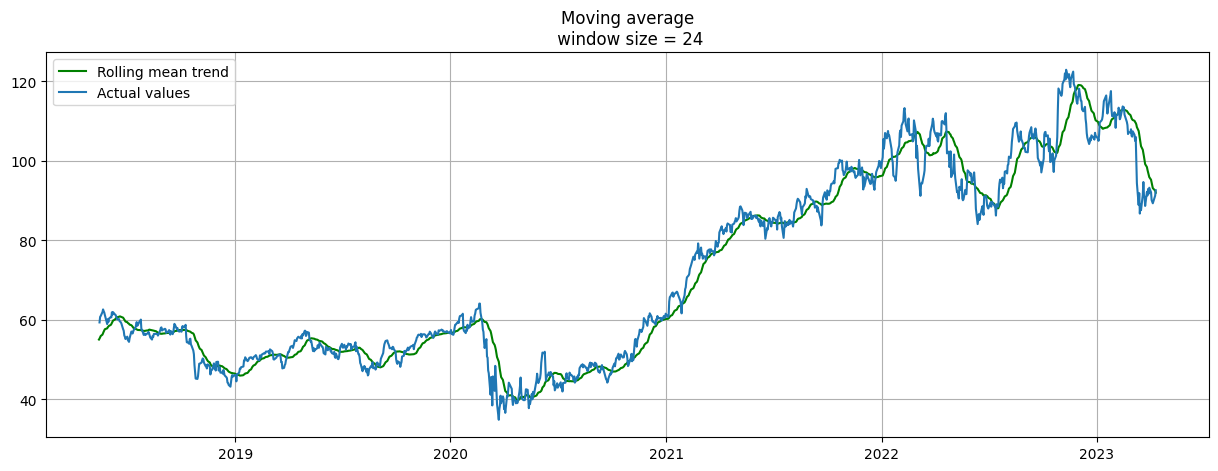

In [32]:
# Plot the moving average of the adjusted closing price with a window of 24 days
plotMovingAverage(Adj_Close, 24)

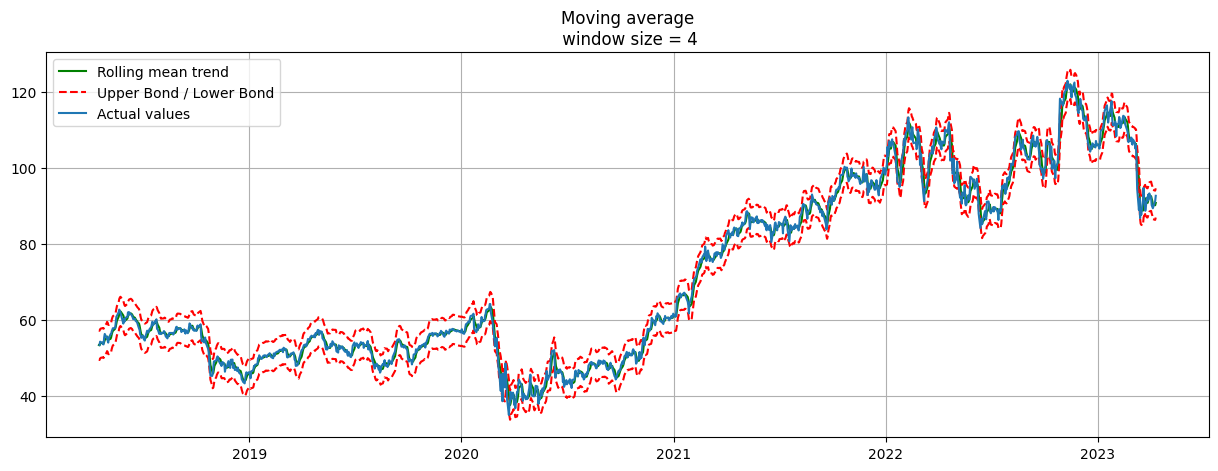

In [33]:
# Plot a 4-day moving average of Adjusted Close price with confidence intervals
plotMovingAverage(Adj_Close, 4, plot_intervals=True)

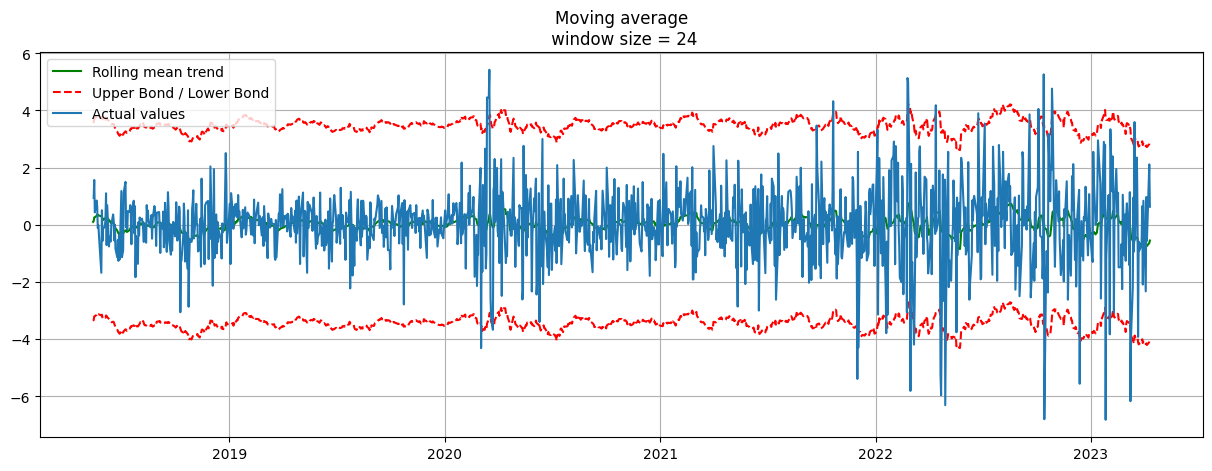

In [34]:
#Plot a 24-day moving average of Adjusted Close price with confidence intervals
plotMovingAverage(Daily_Price_Change, 24, plot_intervals=True)

In [35]:
# Check the data types of the columns again to confirm
print(df.dtypes)

Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                  int64
Year                    int64
Month                   int64
Day                     int64
Daily_Price_Change    float64
dtype: object


In [36]:
# print the type of the index
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [37]:
#Create a copy of the Adj_Close column
Adj_Close_anomaly = Adj_Close.copy()

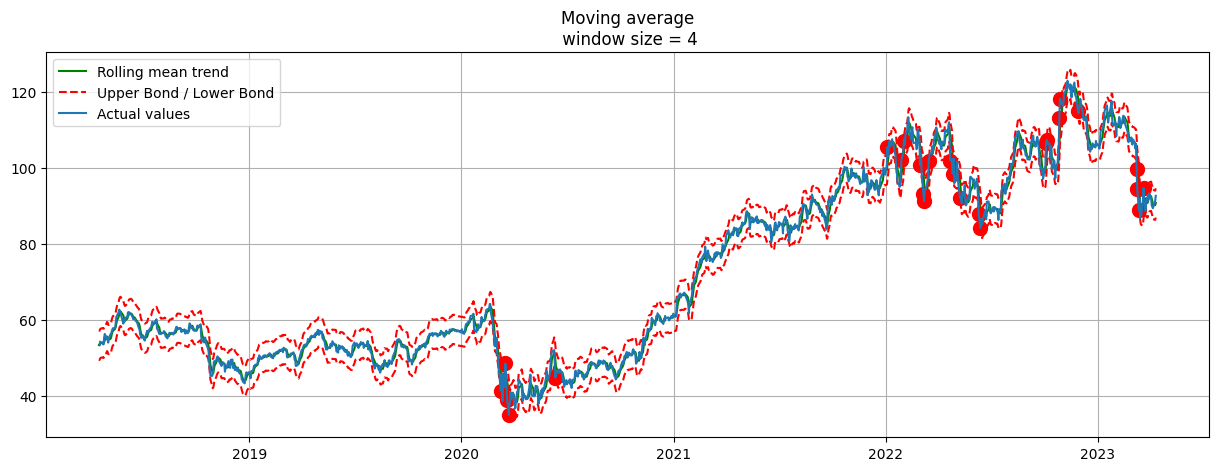

In [38]:
#Plot a moving average with a window size of 4 on the Adj_Close data Also plot intervals and anomalies
plotMovingAverage(Adj_Close_anomaly, 4, plot_intervals=True, plot_anomalies=True)

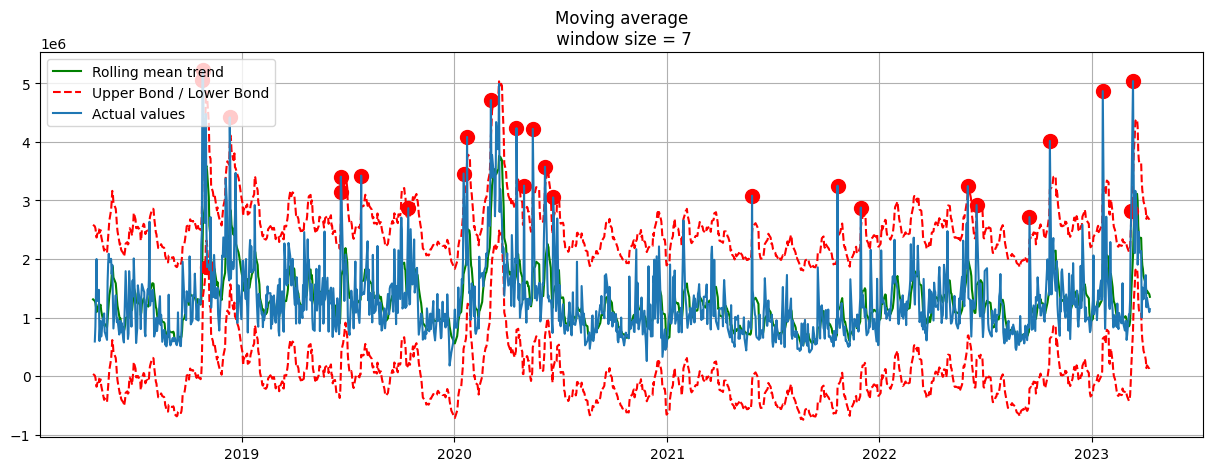

In [39]:
#Plot a moving average with a window size of 7 on the Volume data Also plot intervals and anomalies for weekly smoothing
plotMovingAverage(Volume, 7, plot_intervals=True, plot_anomalies=True)

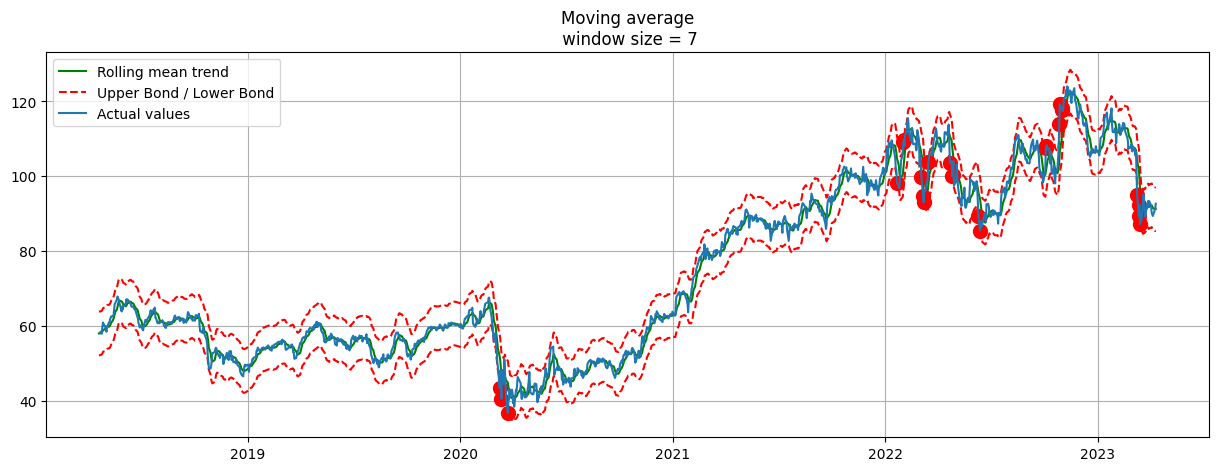

In [40]:
#Plot a moving average with a window size of 7 on the Close data Also plot intervals and anomalies for weekly smoothing
plotMovingAverage(Close, 7, plot_intervals=True, plot_anomalies=True)

In [41]:
import numpy as np

def weighted_average(series, weights):
    """
    Calculate weighted average on the series.
    Assuming weights are sorted in descending order
    (larger weights are assigned to more recent observations).
    """
    if len(series) < len(weights):
        raise ValueError("Length of series is less than length of weights")
        
    weights = np.array(weights)
    weights /= weights.sum()
    
    return np.dot(series[-len(weights):], weights)


In [42]:
weighted_average(Adj_Close, [0.6, 0.3, 0.1])

90.2509991

In [43]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


In [44]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

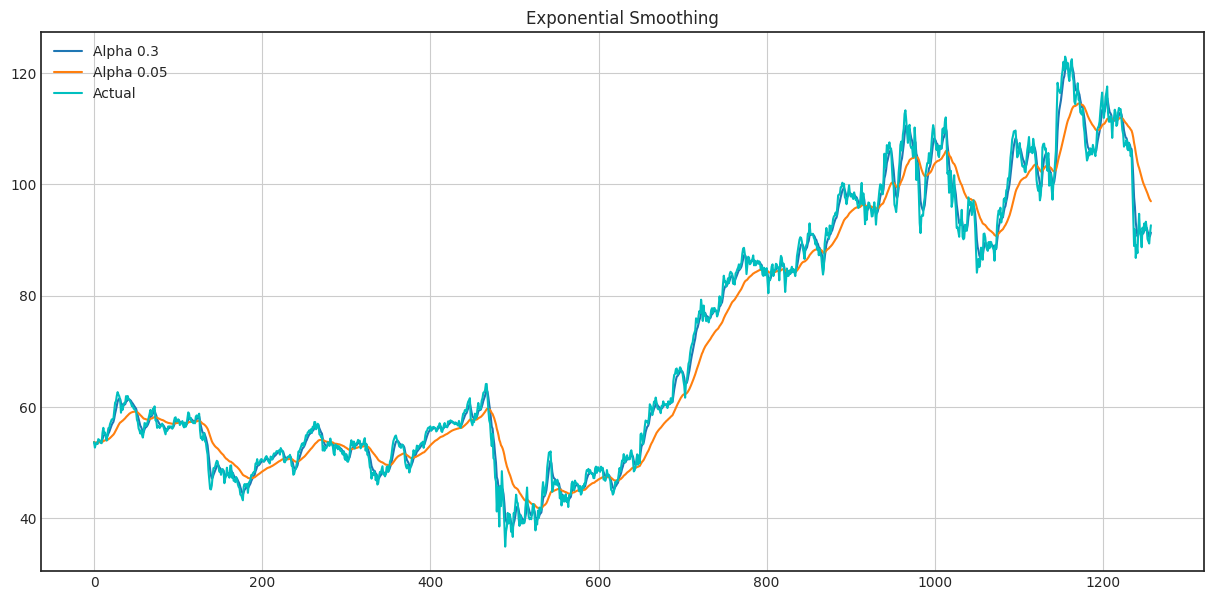

In [45]:
#plotting the exponential smoothing of the adjusted close prices with smoothing parameters of 0.3 and 0.05 respectively
plotExponentialSmoothing(Adj_Close, [0.3, 0.05])

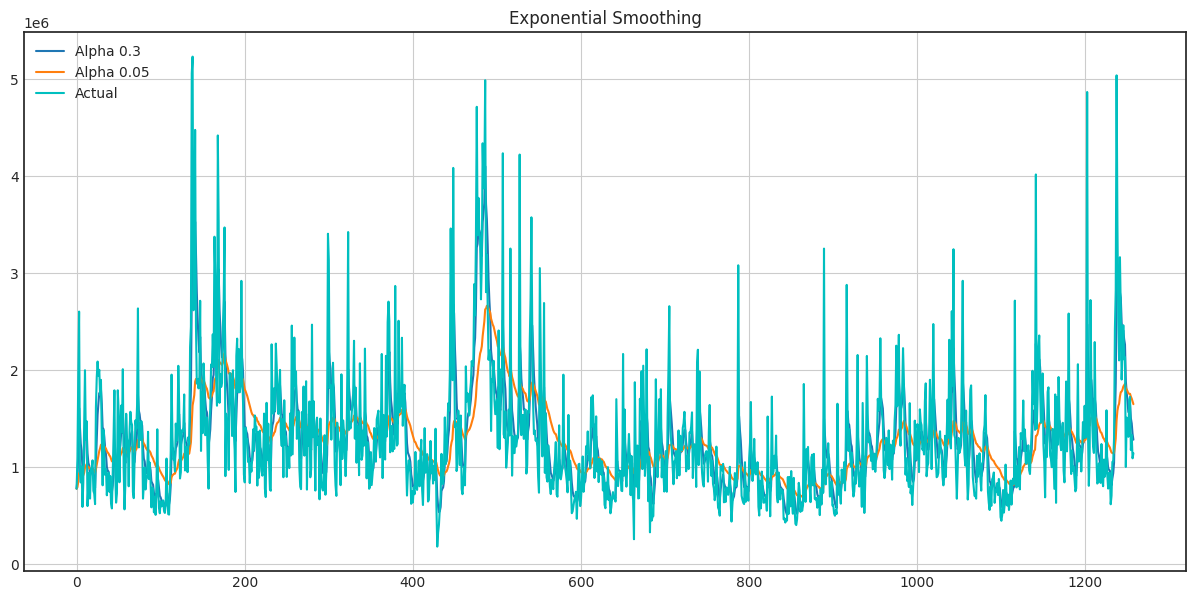

In [46]:
#plotting the exponential smoothing of the volume data with smoothing parameters of 0.3 and 0.05 respectively
plotExponentialSmoothing(Volume, [0.3, 0.05])

In [47]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

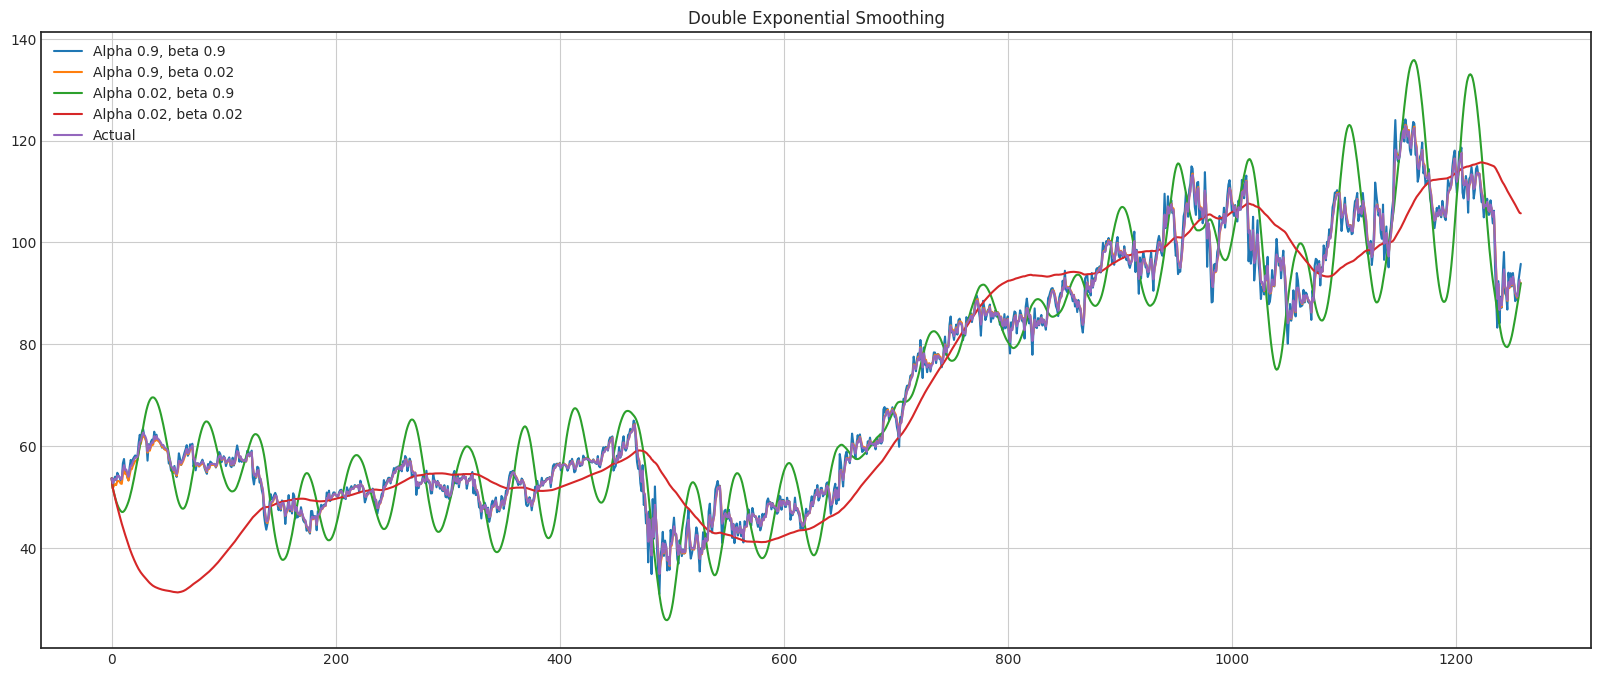

In [48]:
#plotting the double exponential smoothing of the adjusted close prices with alpha values of 0.9 and 0.02, and beta values of 0.9 and 0.02 respectively
plotDoubleExponentialSmoothing(Adj_Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

## Use Holts only if model is expected to have seasonality

In [49]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [50]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [51]:
%%time
data = Adj_Close[:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

0.10439123065356265 0.001813865118891811 0.0004759062553572613
CPU times: user 984 ms, sys: 2.3 ms, total: 986 ms
Wall time: 983 ms


In [52]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

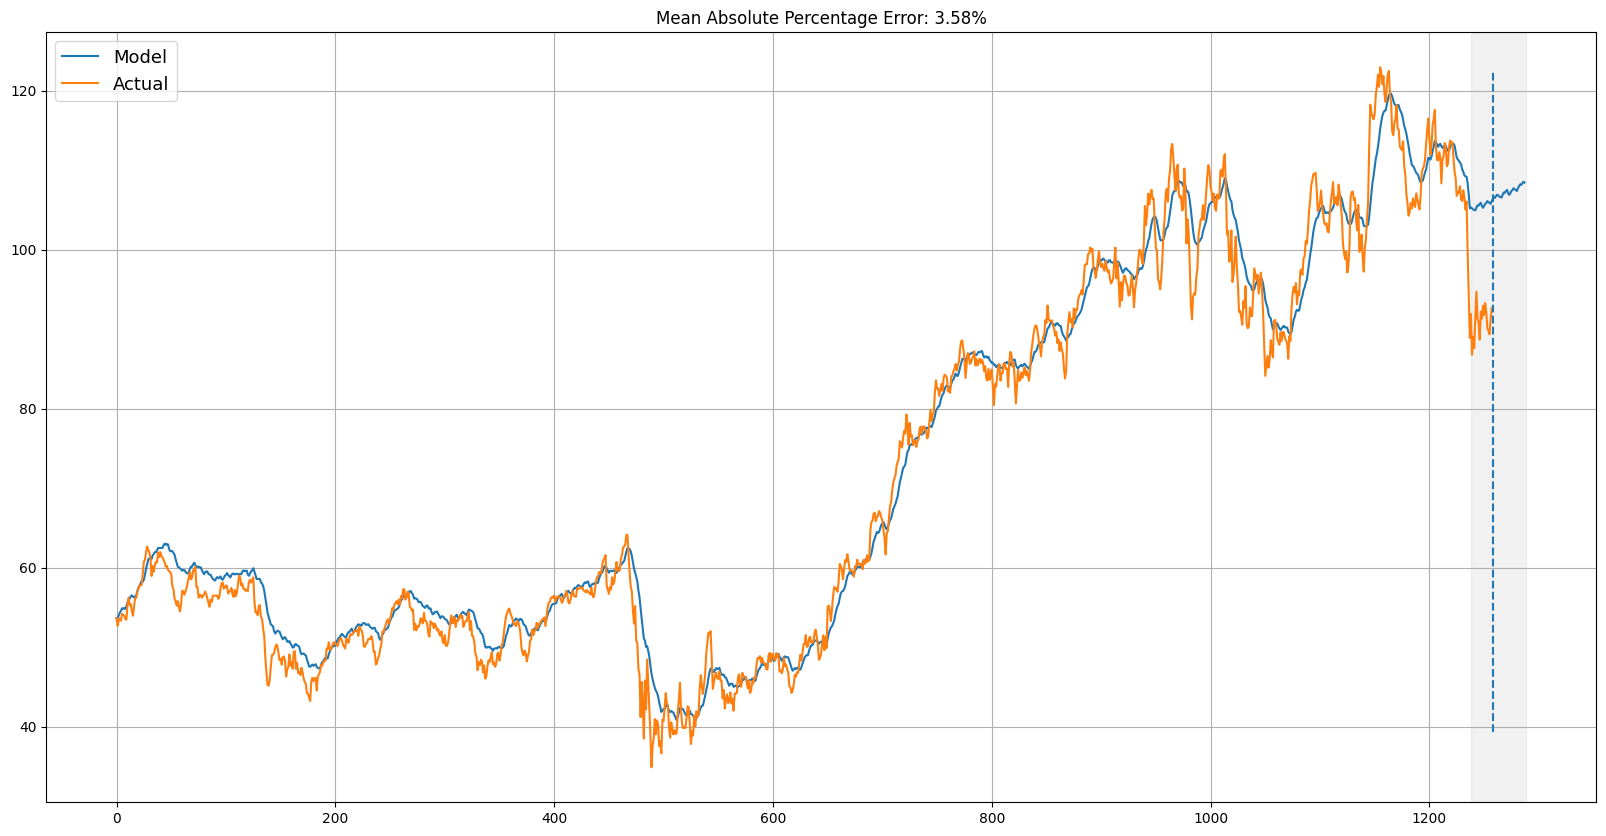

In [53]:
#Plots the time series with the Holt-Winters method to visualize trends and seasonal patterns#
plotHoltWinters(Adj_Close)

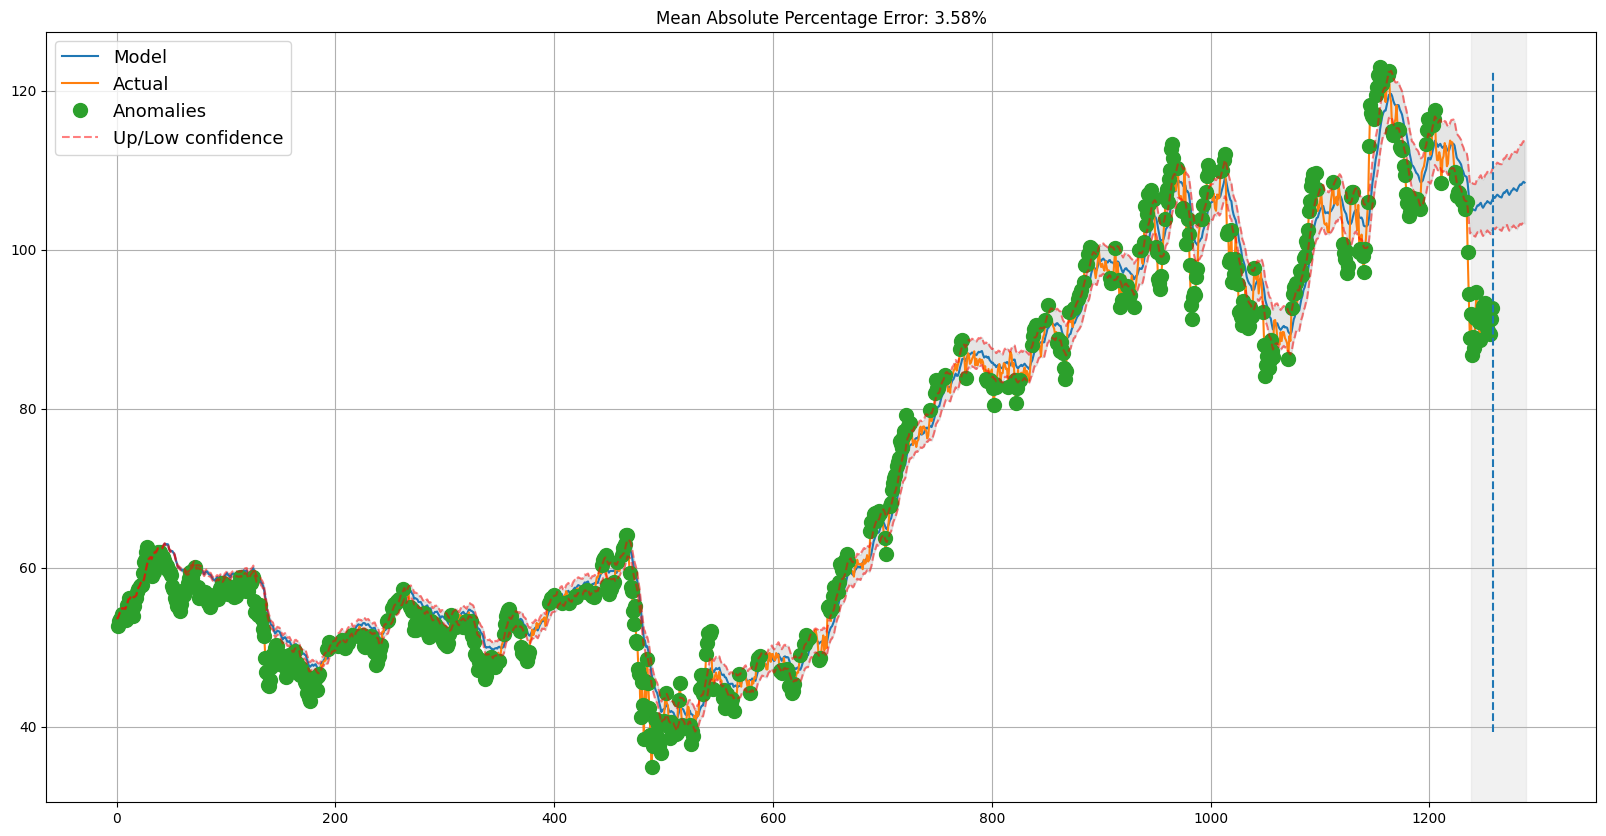

In [54]:
#plots the Holt-Winters exponential smoothing model with confidence intervals and anomalies highlighted for the given time series data of Adjusted Close prices
plotHoltWinters(Adj_Close, plot_intervals=True, plot_anomalies=True)

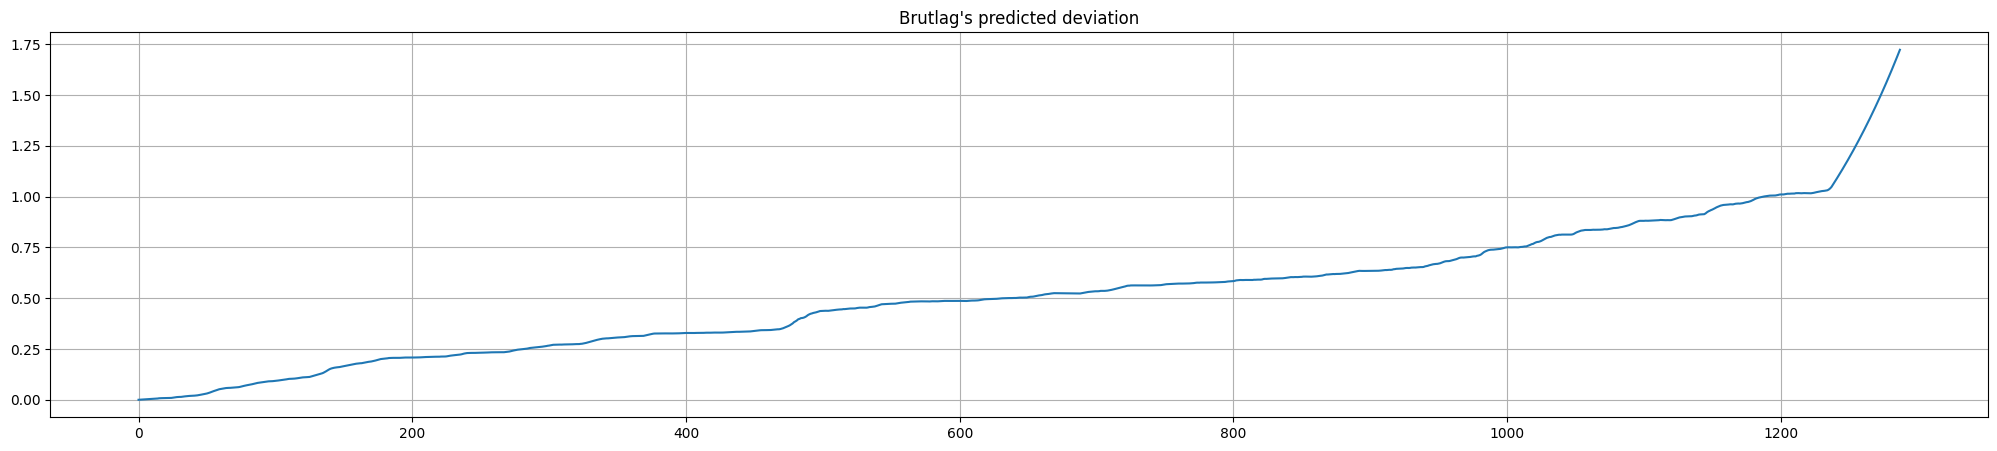

In [55]:
#creates a plot of Brutlag's predicted deviation with a specific figure size and title
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

## Doing Same with Volume (but no seasonal pattern detected, since slen 1 results with the best performing MAPE)

In [56]:
%%time
data = Volume[:-50] 
slen = 1

x = [0, 0, 0] 

opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_absolute_percentage_error, slen), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

model = HoltWinters(data, slen = slen, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 100, scaling_factor = 3)
model.triple_exponential_smoothing()

0.9908910930895134 0.006504178702927299 0.9909322299673178
CPU times: user 4.14 s, sys: 22.2 ms, total: 4.16 s
Wall time: 4.16 s


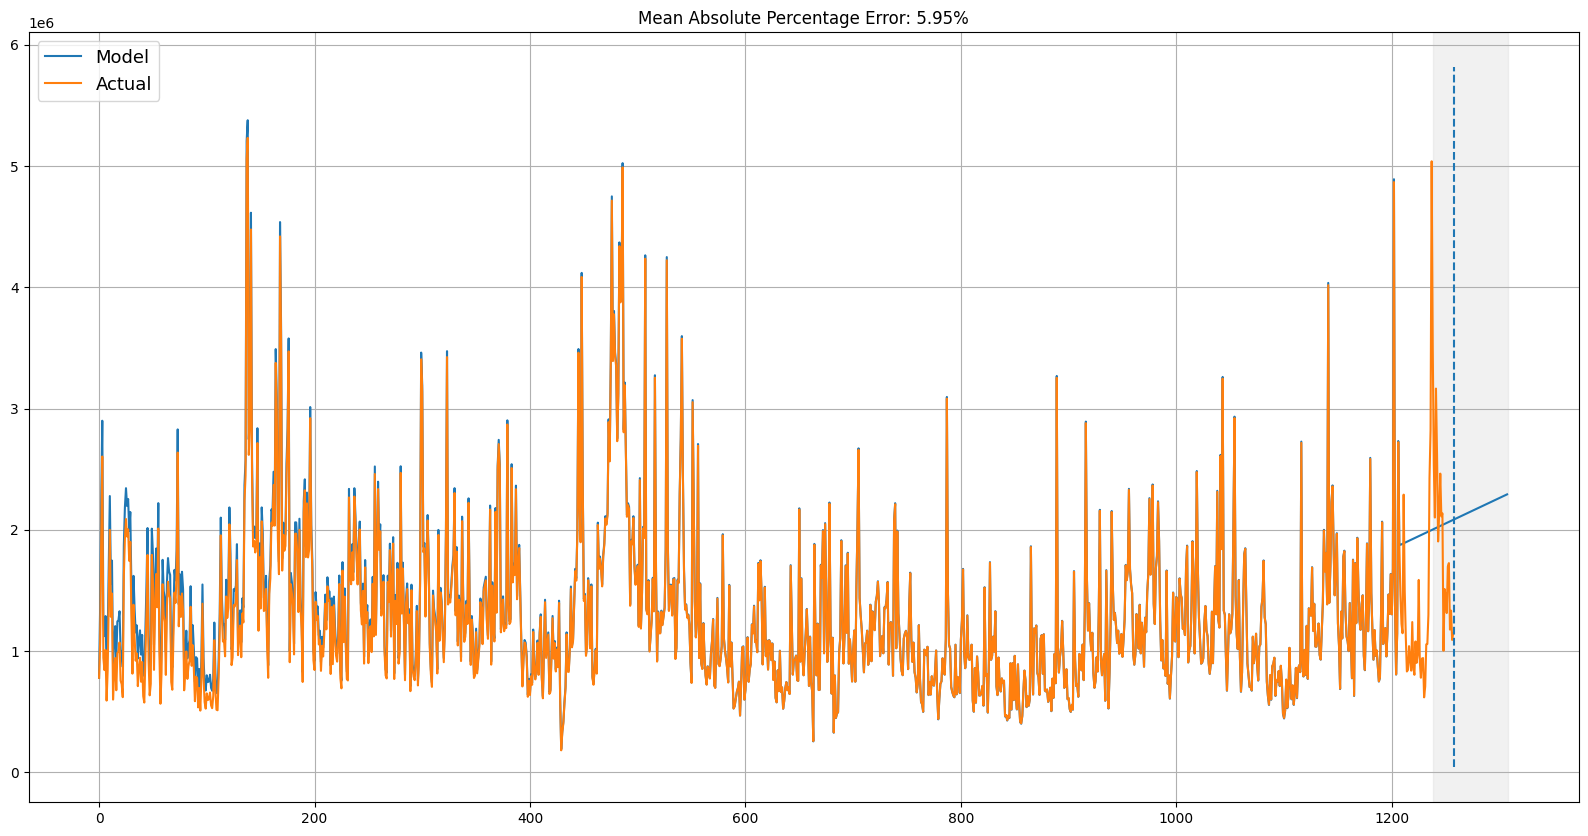

In [57]:
#Plotting the Holt-Winters exponential smoothing model for the volume data
plotHoltWinters(Volume)

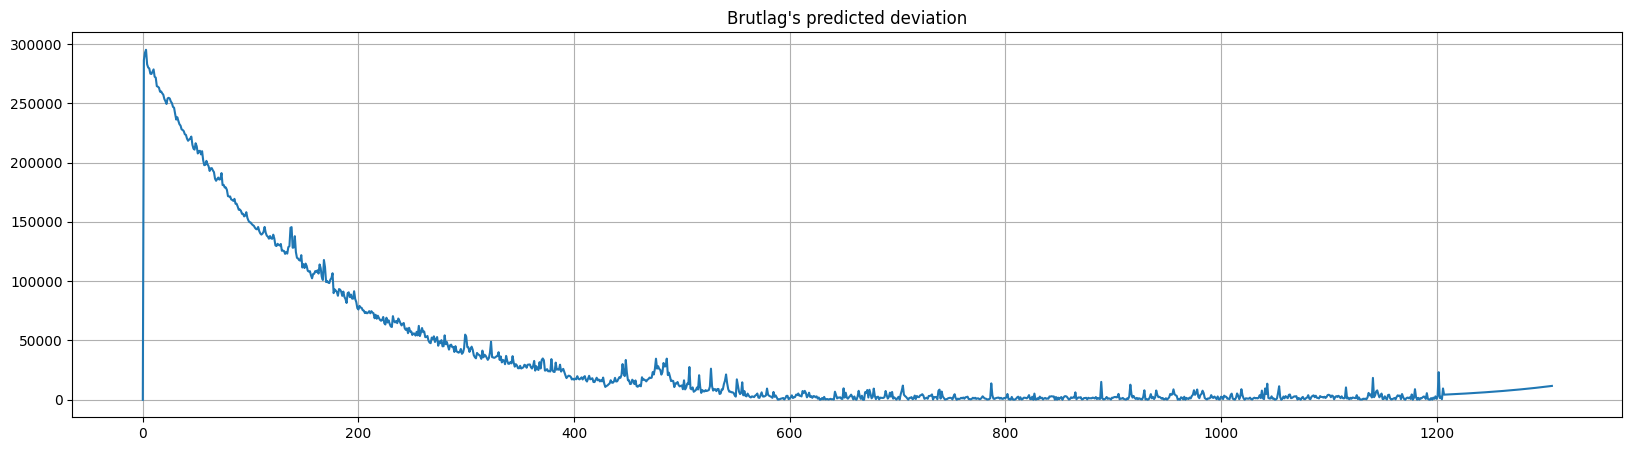

In [58]:
#plotting Brutlag's predicted deviation with a specified figure size and axis settings
plt.figure(figsize=(20, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

## Fixing Non-stationary on Adj_Closed and building Models

In [59]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

/home/scott/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


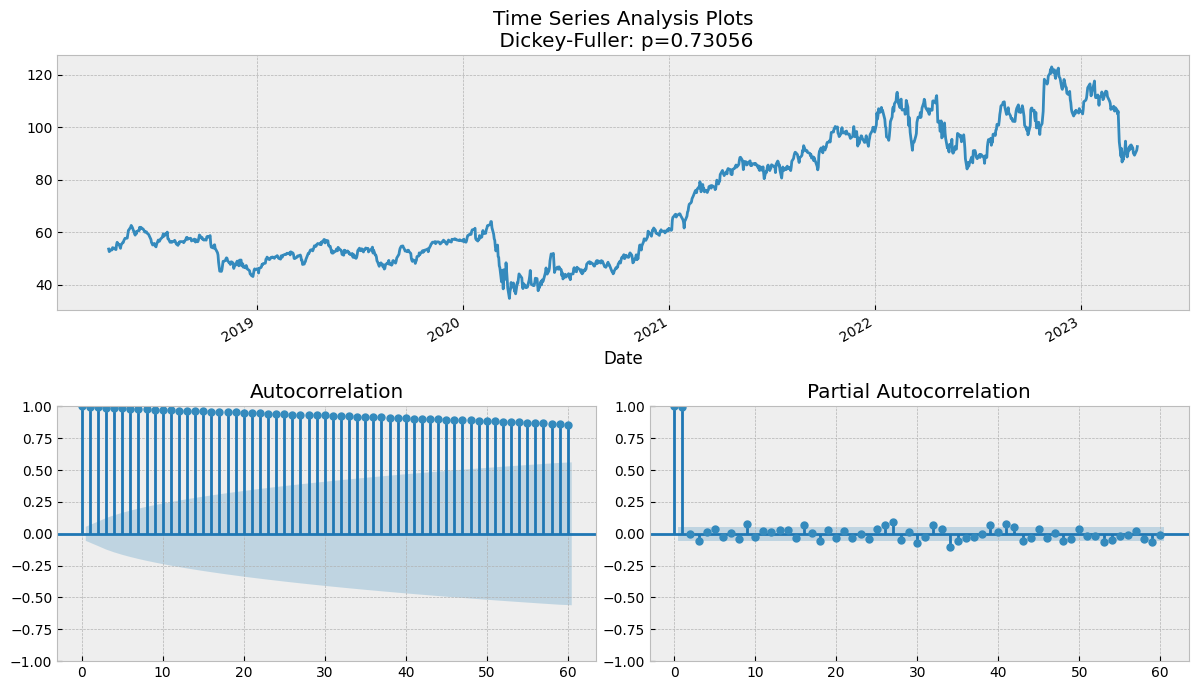

In [60]:
#plots the time series data of Adj_Close along with autocorrelation plots for the first 60 lags
tsplot(Adj_Close, lags=60)

/home/scott/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


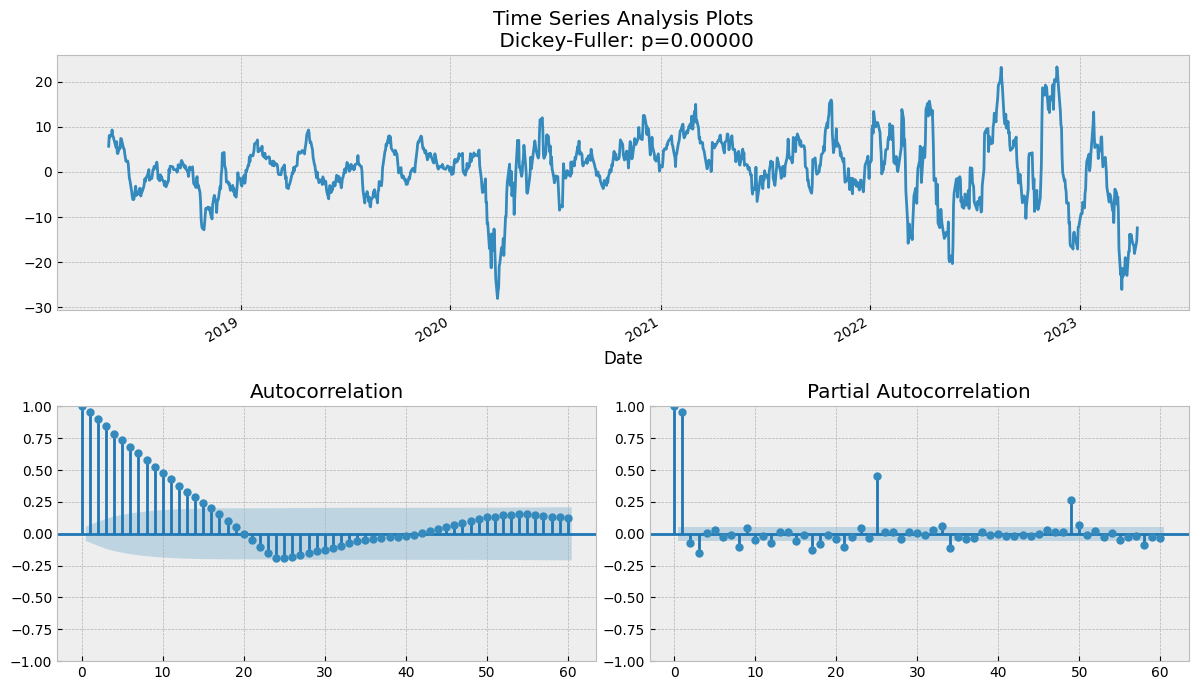

In [61]:
#differencing the time series with a lag of 24 and then plotting the differenced series using tsplot()
Adj_Close_diff = Adj_Close - Adj_Close.shift(24)
tsplot(Adj_Close_diff[24:], lags=60)

/home/scott/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


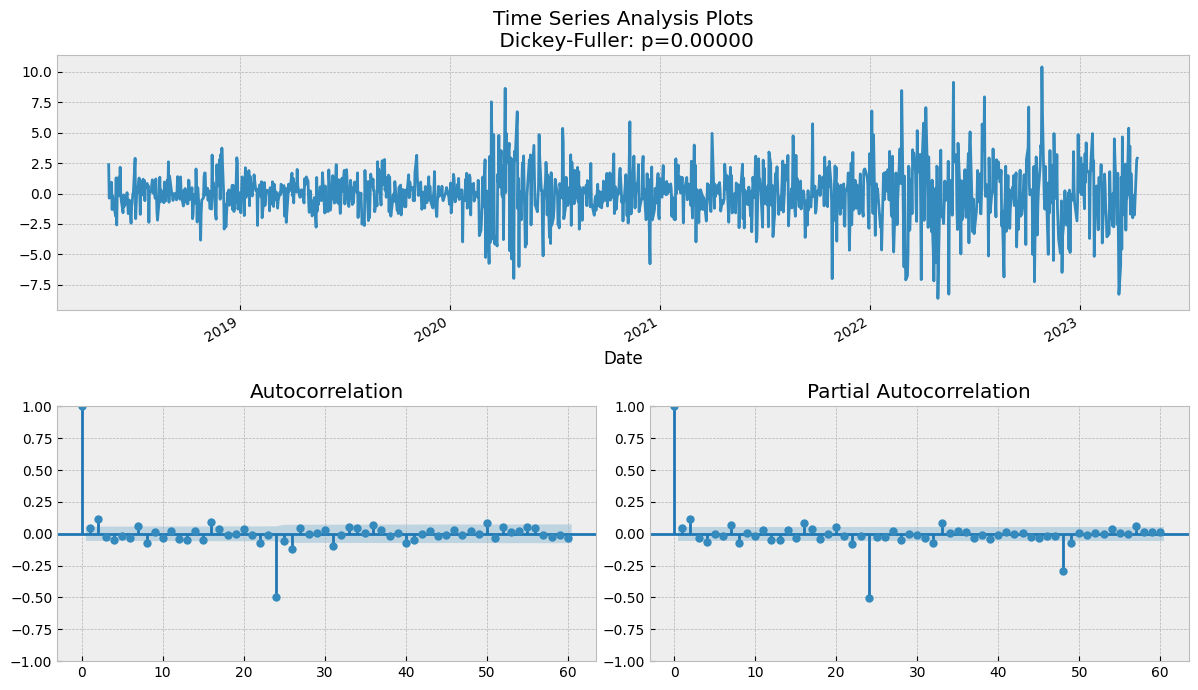

In [62]:
#plotting the autocorrelation of the differenced time series data Adj_Close_diff, after shifting by 1 and 24 time steps
Adj_Close_diff = Adj_Close_diff - Adj_Close_diff.shift(1)
tsplot(Adj_Close_diff[24+1:], lags=60)

In [63]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [64]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(Adj_Close, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [65]:
#optimizeSARIMA function to fit a seasonal ARIMA model to the data, and it times the execution using %time magic command. The result is stored in the result_table variable
%time result_table = optimizeSARIMA(parameters_list, d, D, s)

/tmp/ipykernel_56/1932490229.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/36 [00:00<?, ?it/s]

/home/scott/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/scott/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/scott/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/scott/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

CPU times: user 56min 16s, sys: 1h 49min 49s, total: 2h 46min 5s
Wall time: 14min 22s


In [66]:
#printing best results based on aic
result_table.head()

parameters          aic
0  (2, 2, 0, 1)  4623.248577
1  (4, 4, 0, 1)  4624.229952
2  (4, 4, 1, 1)  4624.244941
3  (2, 2, 1, 1)  4624.664455
4  (3, 2, 0, 1)  4625.121765

In [67]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(Adj_Close, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

/home/scott/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/scott/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                 1258
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 24)   Log Likelihood               -2305.624
Date:                              Wed, 03 May 2023   AIC                           4623.249
Time:                                      18:11:44   BIC                           4653.952
Sample:                                           0   HQIC                          4634.799
                                             - 1258                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3686      0.019     19.867      0.000       0.332       0.405
ar.L2         -0.95

/home/scott/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


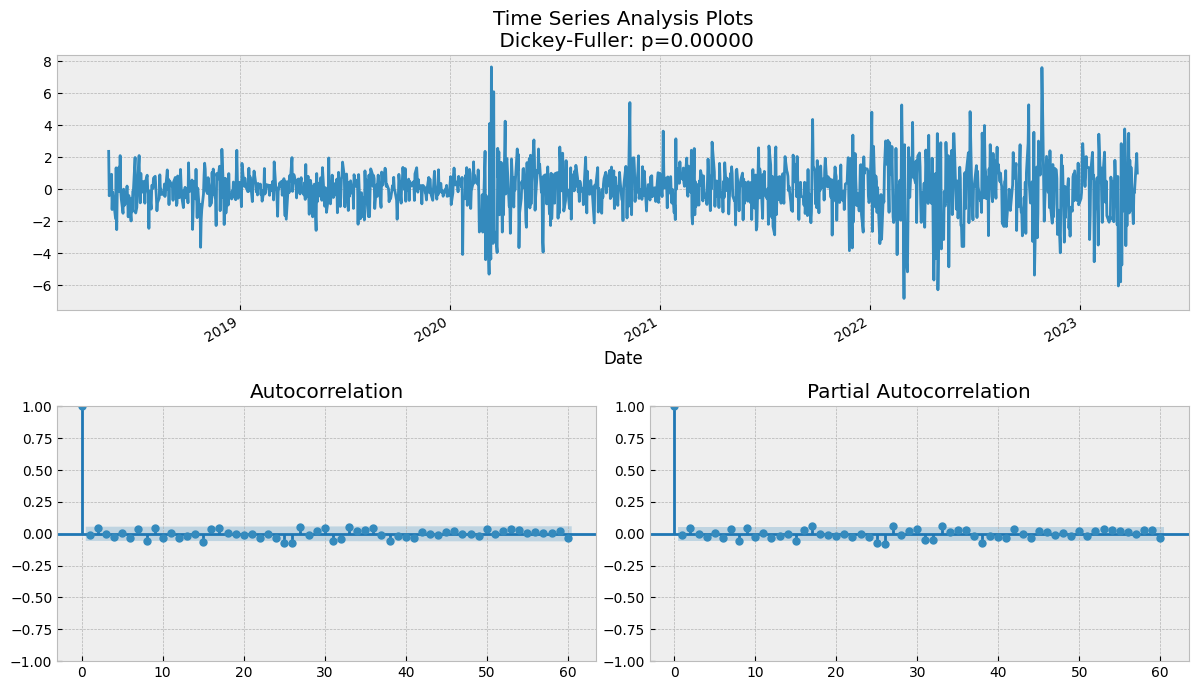

In [68]:
#generates a time series plot of the residuals of the best SARIMA model with a lag of 60
tsplot(best_model.resid[24+1:], lags=60)

In [69]:
#assume you want to predict the next 10 steps
n_steps = 10

# Use the `predict()` method of the best model to obtain predictions for the next `n_steps` time points
predictions = best_model.predict(start=len(Adj_Close), end=len(Adj_Close) + n_steps - 1)

# Print the predictions
print(predictions)


1258    93.056609
1259    93.061223
1260    92.646047
1261    92.626738
1262    92.938947
1263    92.794083
1264    92.523590
1265    92.214756
1266    92.220342
1267    92.732146
Name: predicted_mean, dtype: float64


/home/scott/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


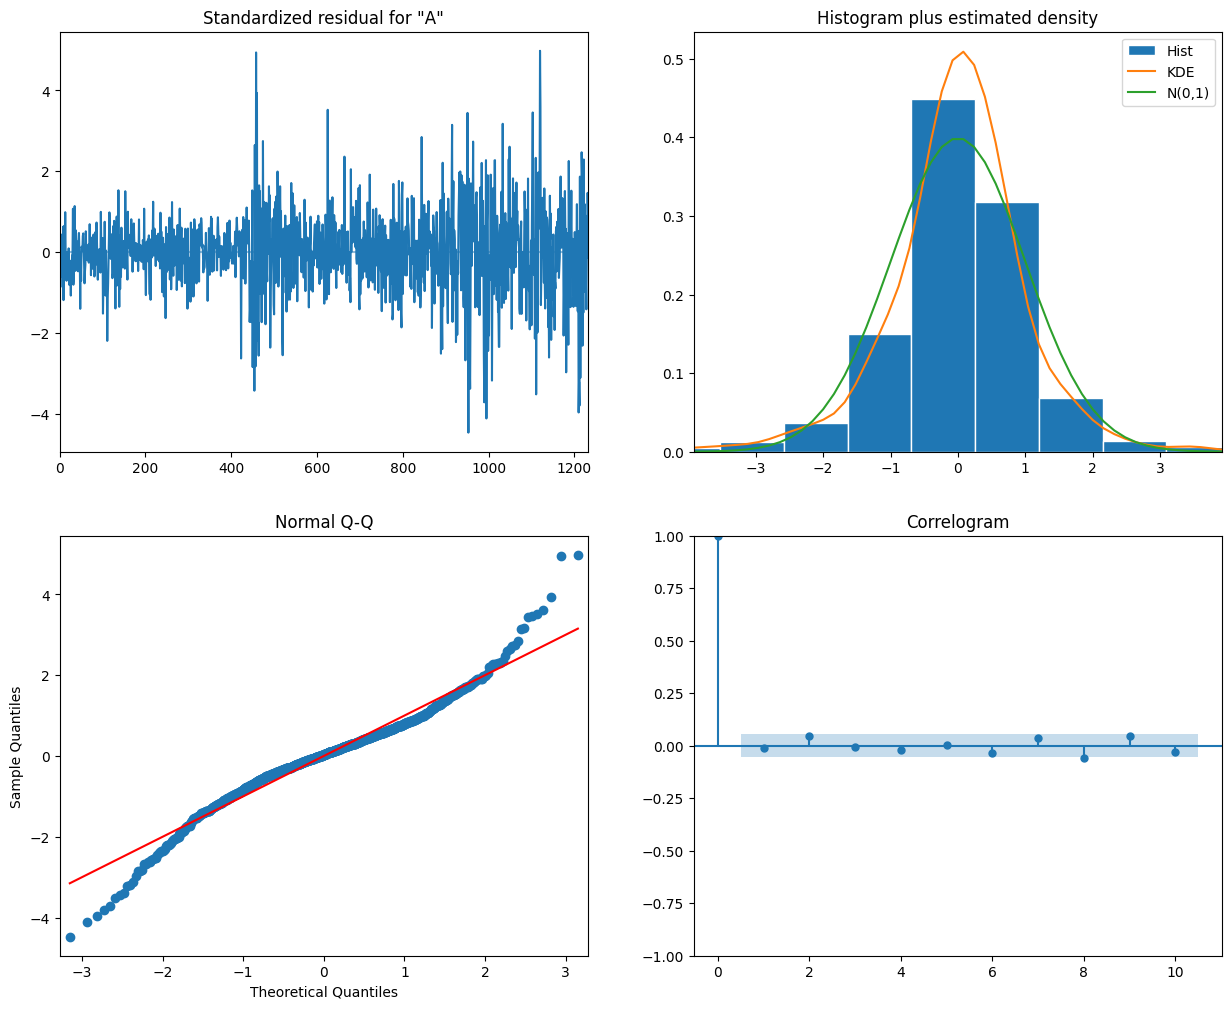

In [70]:
# generate diagnostics plots
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [71]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.name = 'actual'
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = pd.concat([data.arima_model, forecast])
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(series[s+d:], model.fittedvalues[s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(series.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(series, label="actual")
    plt.xlim(pd.Timestamp('2018-03-12'), pd.Timestamp('2023-05-11'))  # set x-axis limits
    plt.legend()
    plt.grid(True)


/home/scott/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


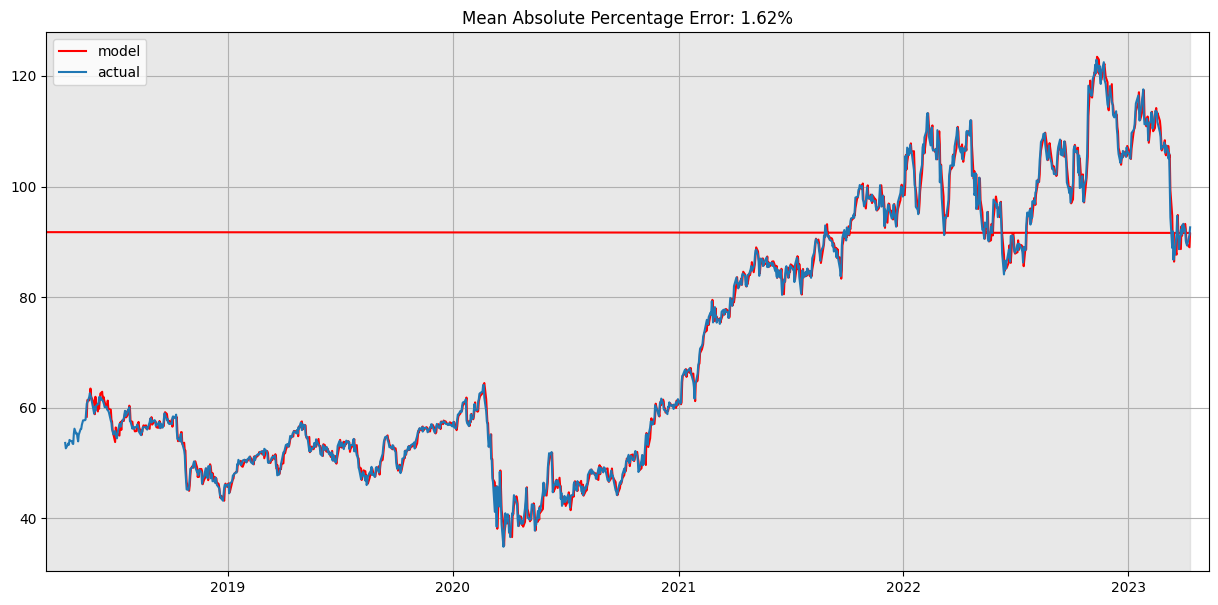

In [72]:
plotSARIMA(Adj_Close, best_model, 50)

In [73]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(Adj_Close.copy())
data.columns = ["y"]

In [74]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

In [75]:
#look at the new dataframe 
data.tail(7)

y      lag_6      lag_7      lag_8      lag_9     lag_10  \
Date                                                                           
2023-03-31  93.269997  90.894005  91.322044  94.696602  91.461411  87.618996   
2023-04-03  92.099998  88.684120  90.894005  91.322044  94.696602  91.461411   
2023-04-04  90.160004  92.198044  88.684120  90.894005  91.322044  94.696602   
2023-04-05  89.779999  91.322044  92.198044  88.684120  90.894005  91.322044   
2023-04-06  89.349998  92.944626  91.322044  92.198044  88.684120  90.894005   
2023-04-10  91.260002  91.770004  92.944626  91.322044  92.198044  88.684120   
2023-04-11  92.629997  93.269997  91.770004  92.944626  91.322044  92.198044   

               lag_11     lag_12     lag_13     lag_14     lag_15     lag_16  \
Date                                                                           
2023-03-31  89.052437  86.762917  91.899406  88.903114  94.417877  99.663872   
2023-04-03  87.618996  89.052437  86.762917  91.899406  88.903114  94.417877   
2023-04-04  91.461411  87.618996  89.052437  86.762917  91.899406  88.903114   
2023-04-05  94.696602  91.461411  87.618996  89.052437  86.762917  91.899406   
2023-04-06  91.322044  94.696602  91.461411  87.618996  89.052437  86.762917   
2023-04-10  90.894005  91.322044  94.696602  91.461411  87.618996  89.052437   
2023-04-11  88.684120  90.894005  91.322044  94.696602  91.461411  87.618996   

                lag_17      lag_18      lag_19      lag_20      lag_21  \
Date                                                                     
2023-03-31  106.044670  105.049225  106.572250  107.448250  106.114349   
2023-04-03   99.663872  106.044670  105.049225  106.572250  107.448250   
2023-04-04   94.417877   99.663872  106.044670  105.049225  106.572250   
2023-04-05   88.903114   94.417877   99.663872  106.044670  105.049225   
2023-04-06   91.899406   88.903114   94.417877   99.663872  106.044670   
2023-04-10   86.762917   91.899406   88.903114   94.417877   99.663872   
2023-04-11   89.052437   86.762917   91.899406   88.903114   94.417877   

                lag_22      lag_23      lag_24  
Date                                            
2023-03-31  106.333344  107.965874  107.139656  
2023-04-03  106.114349  106.333344  107.965874  
2023-04-04  107.448250  106.114349  106.333344  
2023-04-05  106.572250  107.448250  106.114349  
2023-04-06  105.049225  106.572250  107.448250  
2023-04-10  106.044670  105.049225  106.572250  
2023-04-11   99.663872  106.044670  105.049225

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [77]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [78]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [79]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

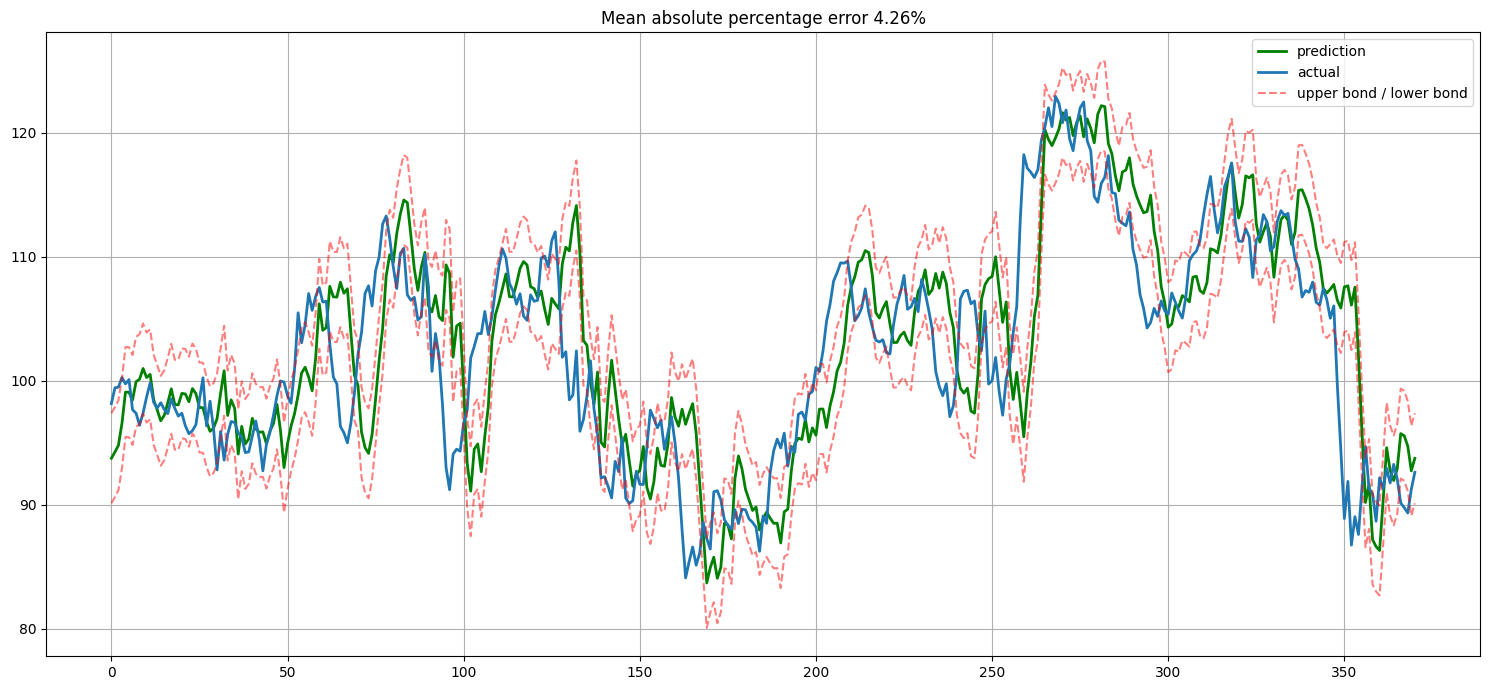

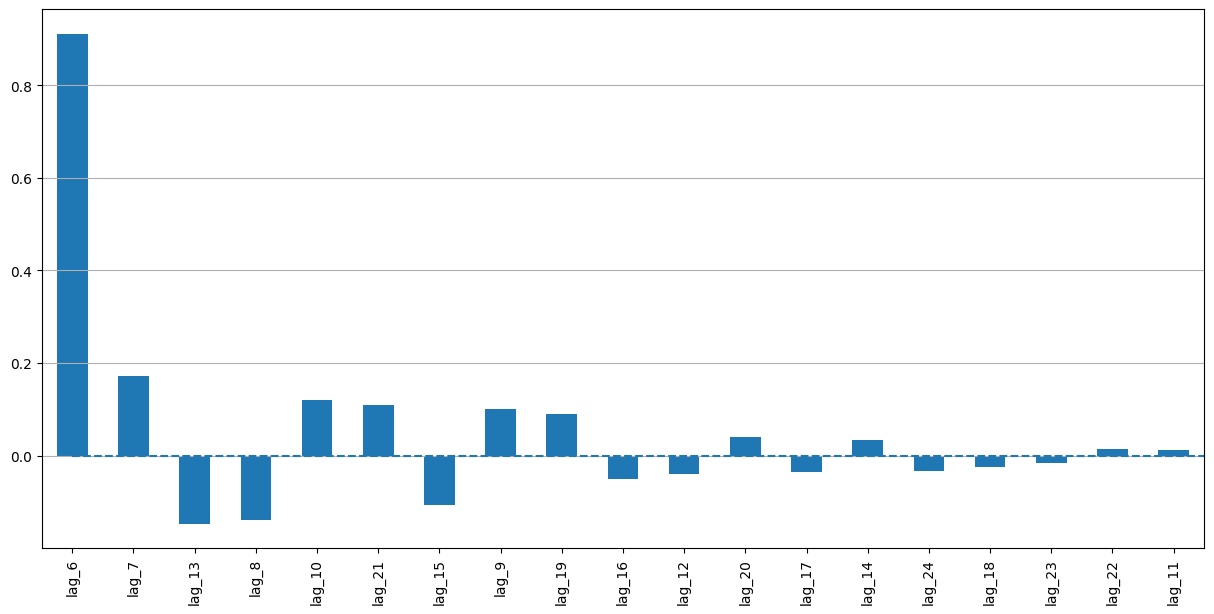

In [81]:
#plotting the model results and coefficients for a linear regression model
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

## Feature extraction 

In [82]:
data["Weekday"] = data.index.weekday
# Extract the year, month, and day, adn weekday features from the index
data["Year"] = df.index.year
data["Month"] = df.index.month
data["Day"] = df.index.day
data.tail()

y      lag_6      lag_7      lag_8      lag_9     lag_10  \
Date                                                                           
2023-04-04  90.160004  92.198044  88.684120  90.894005  91.322044  94.696602   
2023-04-05  89.779999  91.322044  92.198044  88.684120  90.894005  91.322044   
2023-04-06  89.349998  92.944626  91.322044  92.198044  88.684120  90.894005   
2023-04-10  91.260002  91.770004  92.944626  91.322044  92.198044  88.684120   
2023-04-11  92.629997  93.269997  91.770004  92.944626  91.322044  92.198044   

               lag_11     lag_12     lag_13     lag_14  ...      lag_19  \
Date                                                    ...               
2023-04-04  91.461411  87.618996  89.052437  86.762917  ...  106.044670   
2023-04-05  94.696602  91.461411  87.618996  89.052437  ...   99.663872   
2023-04-06  91.322044  94.696602  91.461411  87.618996  ...   94.417877   
2023-04-10  90.894005  91.322044  94.696602  91.461411  ...   88.903114   
2023-04-11  88.684120  90.894005  91.322044  94.696602  ...   91.899406   

                lag_20      lag_21      lag_22      lag_23      lag_24  \
Date                                                                     
2023-04-04  105.049225  106.572250  107.448250  106.114349  106.333344   
2023-04-05  106.044670  105.049225  106.572250  107.448250  106.114349   
2023-04-06   99.663872  106.044670  105.049225  106.572250  107.448250   
2023-04-10   94.417877   99.663872  106.044670  105.049225  106.572250   
2023-04-11   88.903114   94.417877   99.663872  106.044670  105.049225   

            Weekday  Year  Month  Day  
Date                                   
2023-04-04        1  2023      4    4  
2023-04-05        2  2023      4    5  
2023-04-06        3  2023      4    6  
2023-04-10        0  2023      4   10  
2023-04-11        1  2023      4   11  

[5 rows x 24 columns]

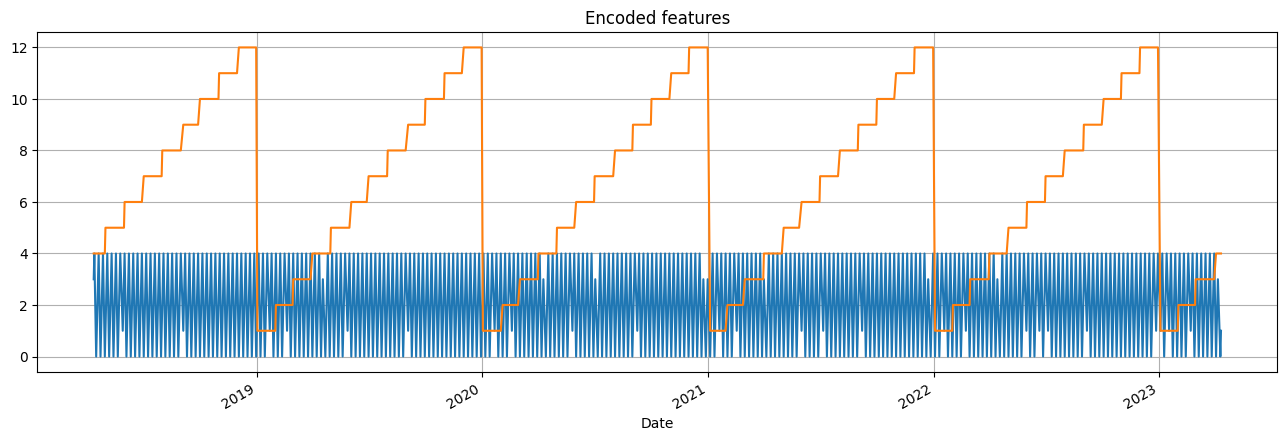

In [83]:
#plots the encoded features "weekday" and "Month" with the title "Encoded features" and adds a grid to the plot. The figsize parameter is set to (16, 5)
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.Weekday.plot()
data.Month.plot()
plt.grid(True);

In [84]:
from sklearn.preprocessing import StandardScaler
#Initialize a StandardScaler object
scaler = StandardScaler()

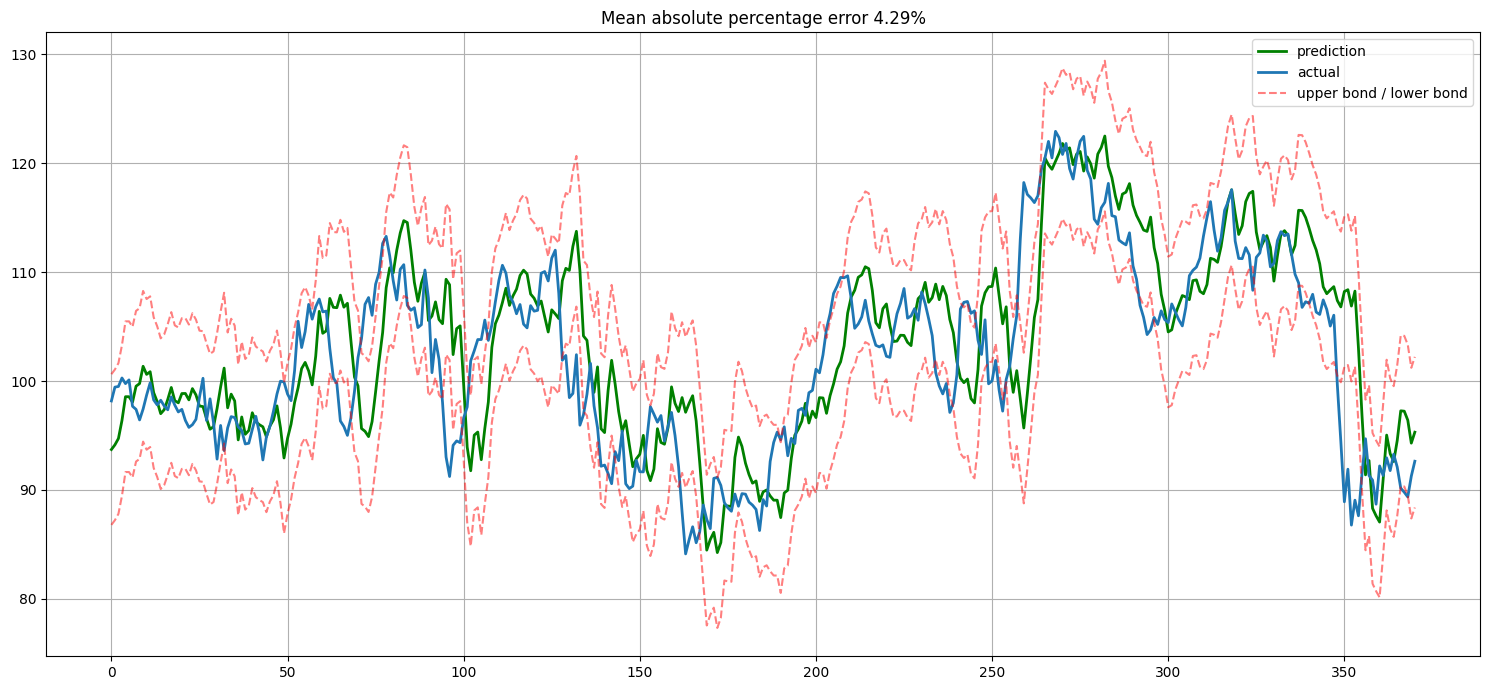

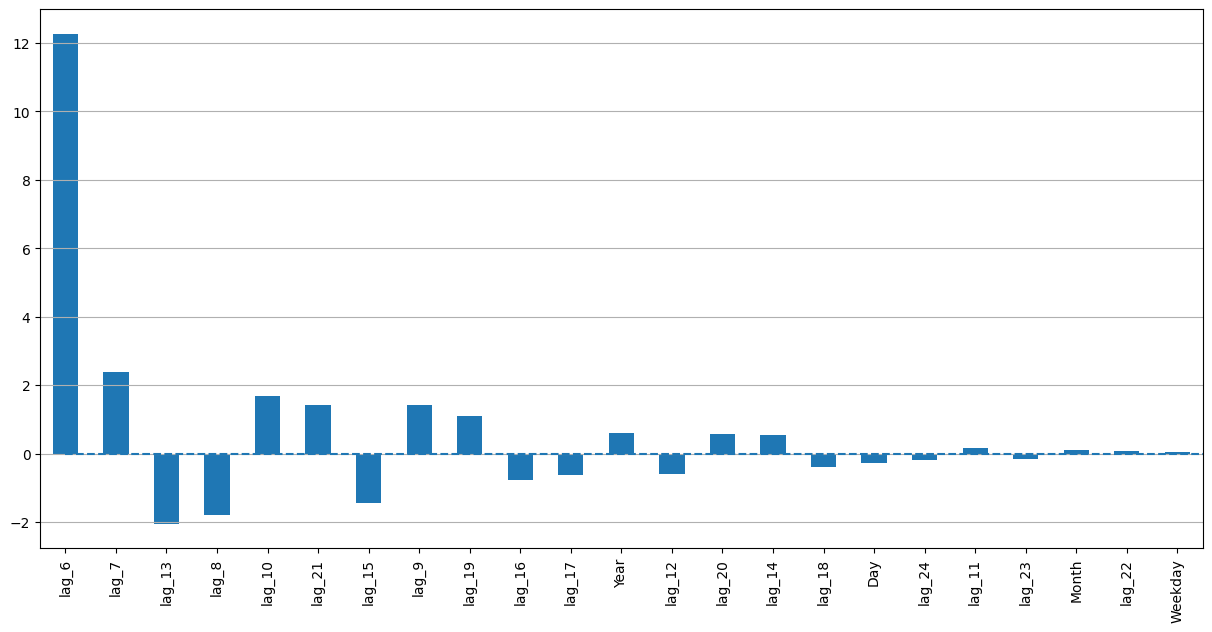

In [85]:
#Extract the target variable 'y' from the data, and extract the features in 'X'
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

#Split the data into training and testing sets using timeseries_train_test_split function
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

#Standardize the feature data using the scaler's fit_transform and transform methods
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit a LinearRegression model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

#Visualize the model's performance on both training and testing data using plotModelResults function with plot_intervals set to True
plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
#Plot the coefficients of the linear regression model using plotCoefficients function
plotCoefficients(lr)

In [113]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

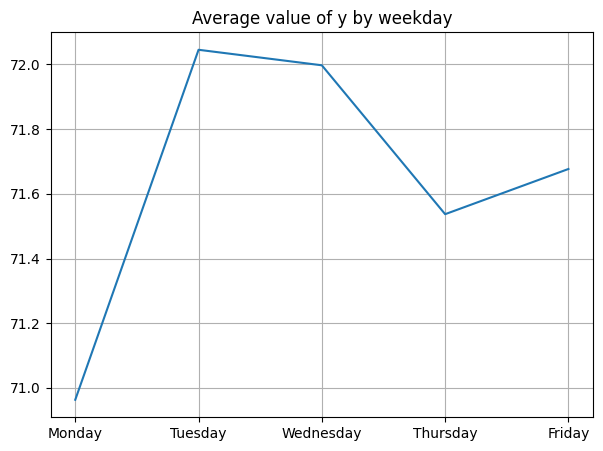

In [115]:
# calculate average value of y by weekday
average_hour = code_mean(data, 'Weekday', "y")

# plot weekday averages
plt.figure(figsize=(7, 5))
plt.title("Average value of y by weekday")
ax = pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.grid(True)


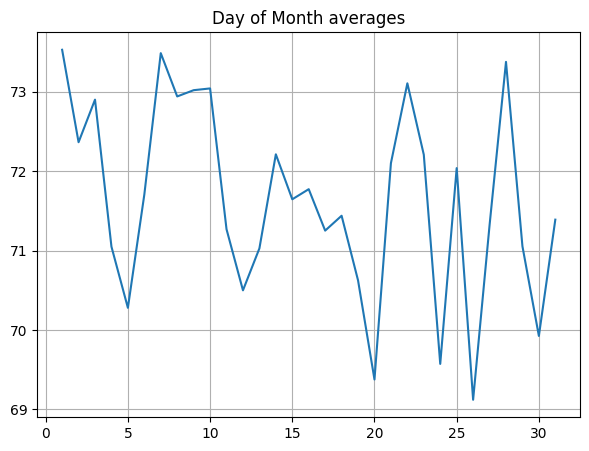

In [88]:
# Calculate average values of 'y' grouped by 'Day'
average_day = code_mean(data, 'Day', "y")

# Plot the result
plt.figure(figsize=(7, 5))
plt.title("Day of Month averages")
pd.DataFrame.from_dict(average_day, orient='index')[0].plot()
plt.grid(True)

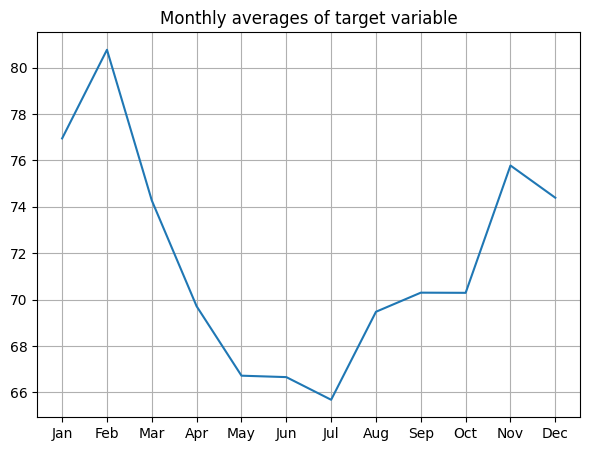

In [109]:
# Calculate the average value of 'y' for each month
average_month = code_mean(data, 'Month', "y")

# Create a figure and plot the monthly averages
plt.figure(figsize=(7, 5))
plt.title("Monthly averages of target variable")

# Define the tick positions and labels for the x-axis
tick_pos = range(len(average_month))
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the monthly averages and set the x-tick labels
plt.plot(average_month.values())
plt.xticks(tick_pos, tick_labels)

plt.grid(True)


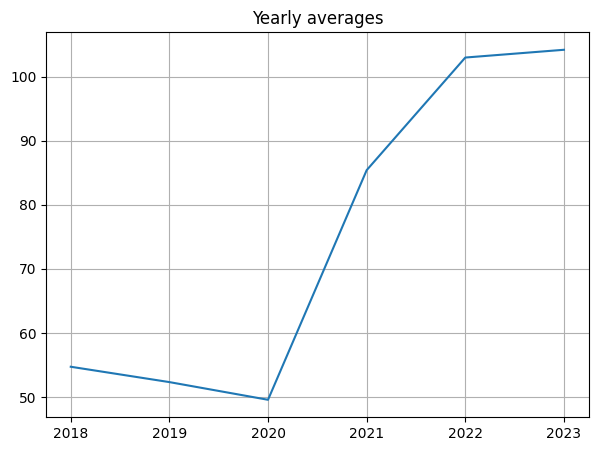

In [90]:
# calculate the average target value for each year
average_year = code_mean(data, 'Year', "y")

# plot the year averages
plt.figure(figsize=(7, 5))
plt.title("Yearly averages")
pd.DataFrame.from_dict(average_year, orient='index')[0].plot()
plt.grid(True)

In [91]:
print(data.head())

                    y  lag_6  lag_7  lag_8  lag_9  lag_10  lag_11  lag_12  \
Date                                                                        
2018-04-12  53.660126    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2018-04-13  52.680908    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2018-04-16  53.302921    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2018-04-17  53.573898    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2018-04-18  53.321400    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

            lag_13  lag_14  ...  lag_19  lag_20  lag_21  lag_22  lag_23  \
Date                        ...                                           
2018-04-12     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2018-04-13     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2018-04-16     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2018-04-17     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2018-04-18

In [92]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    data.index = pd.to_datetime(data.index)
    data["Month"] = data.index.month
    data["weekday"] = data.index.weekday
    data["Day"] = data.index.day
    data["Year"] = data.index.year
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["Month_average"] = list(map(code_mean(data[:test_index], 'Month', "y").get, data.index.month))
        data["Day_average"] = list(map(code_mean(data[:test_index], 'Day', "y").get, data.index.day))
        data["Year_average"] = list(map(code_mean(data[:test_index], 'Year', "y").get, data.index.year))

        # drop encoded variables 
        data.drop(["Month", "weekday","Day","Year"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test


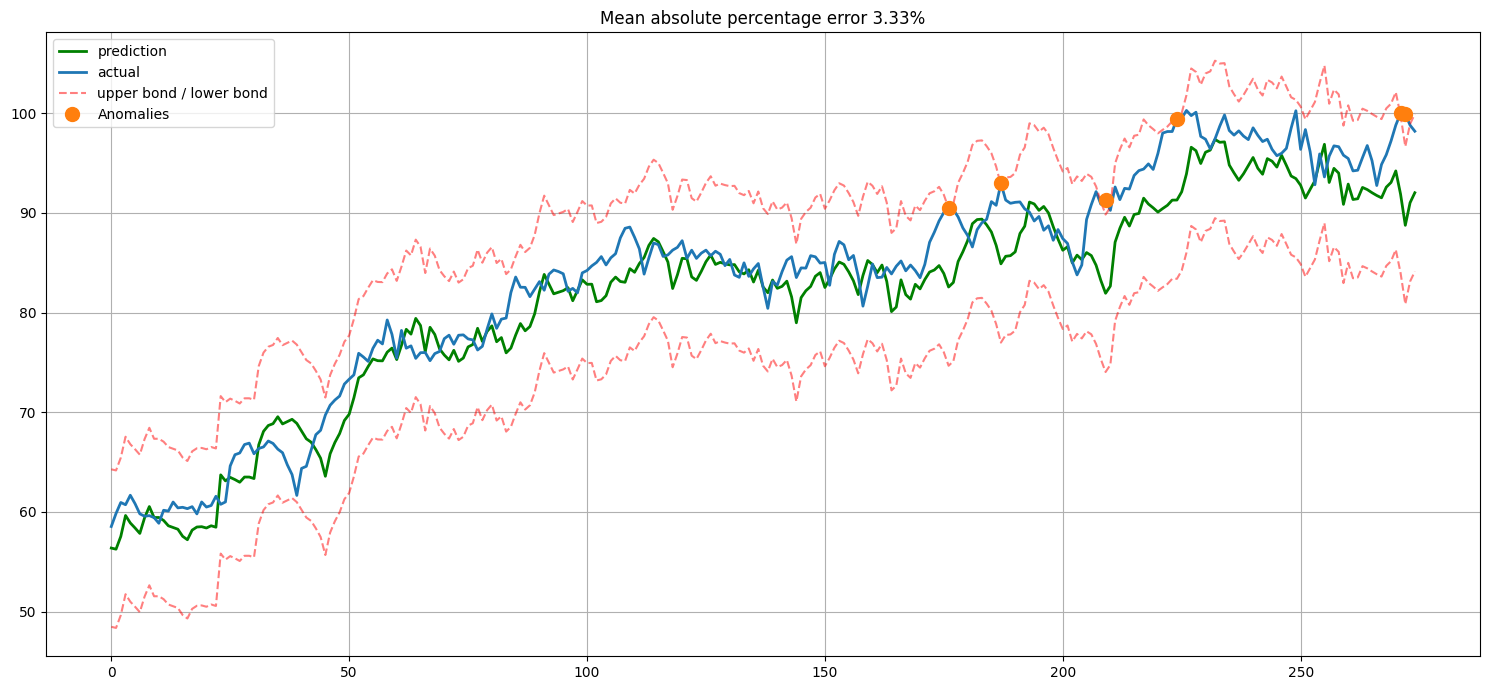

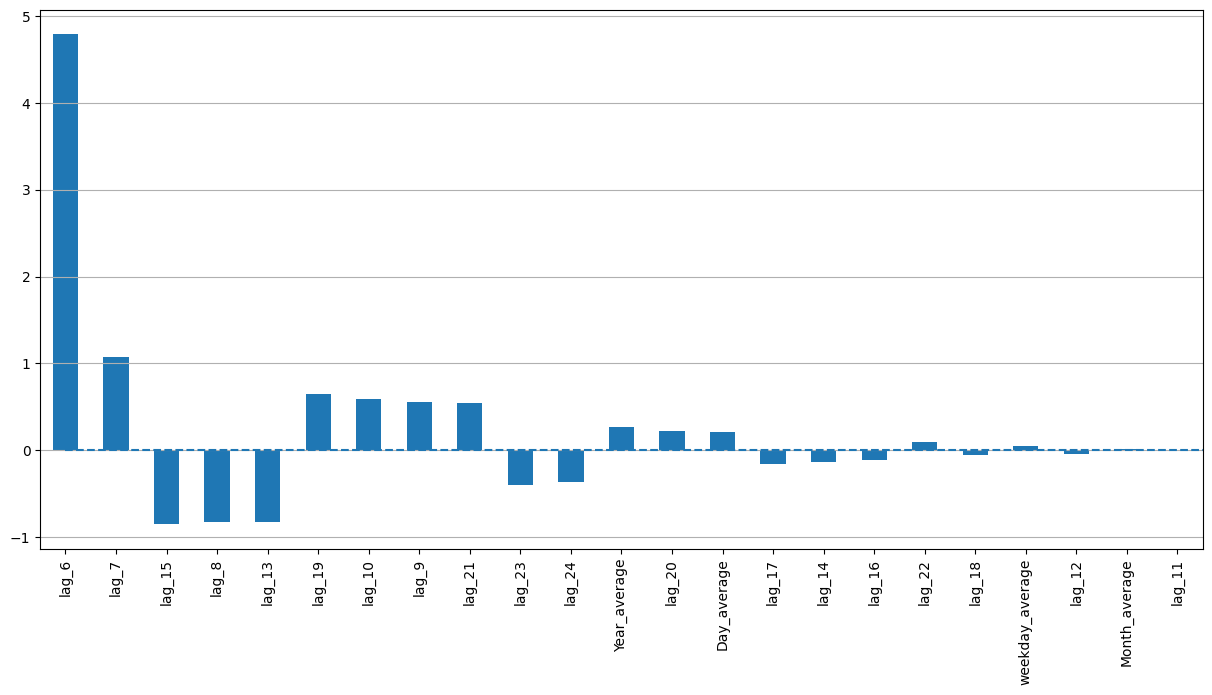

In [94]:
# prepare the data using the prepareData function
X_train, X_test, y_train, y_test = prepareData(Adj_Close, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

# use StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# plot the model results including intervals and anomalies, as well as the coefficients
plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

In [95]:
# Prepare data for linear regression with lagged variables and without target encoding
X_train, X_test, y_train, y_test = prepareData(Adj_Close, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

# Scale the features using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

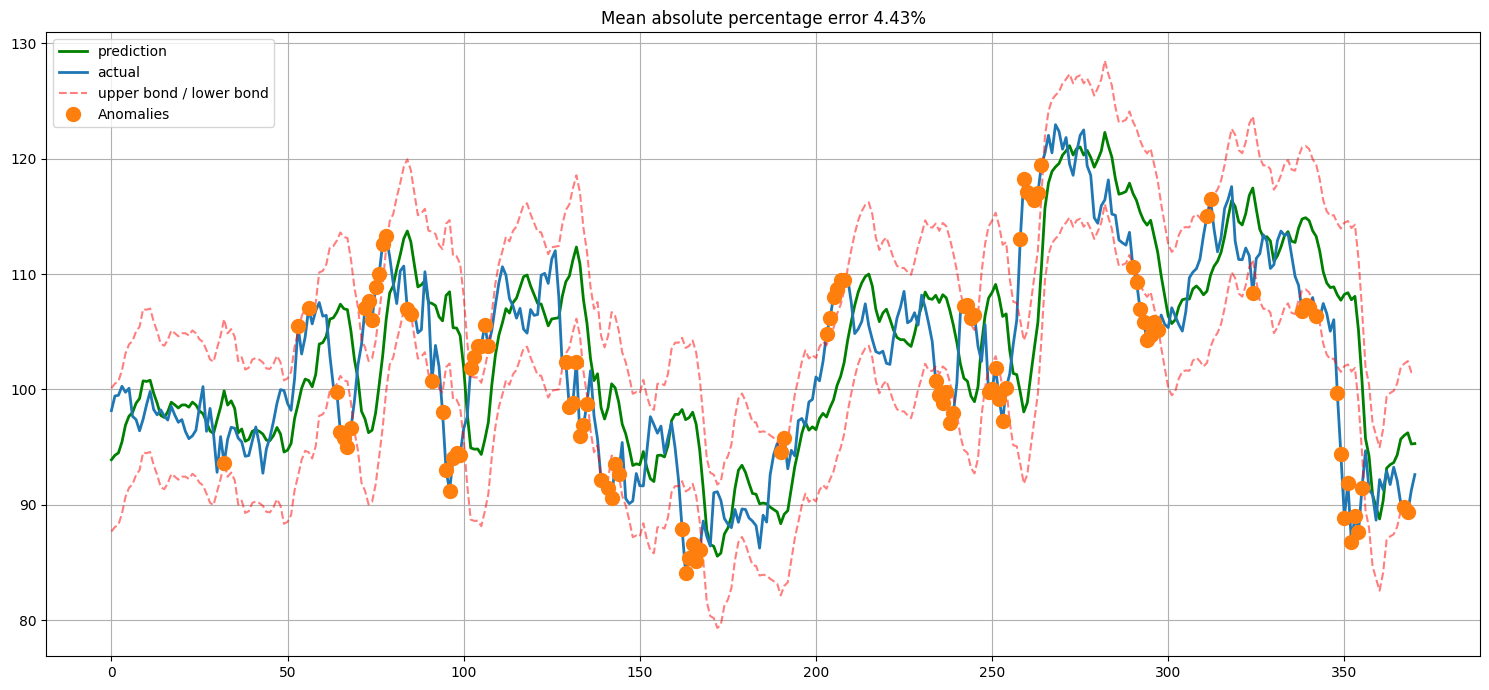

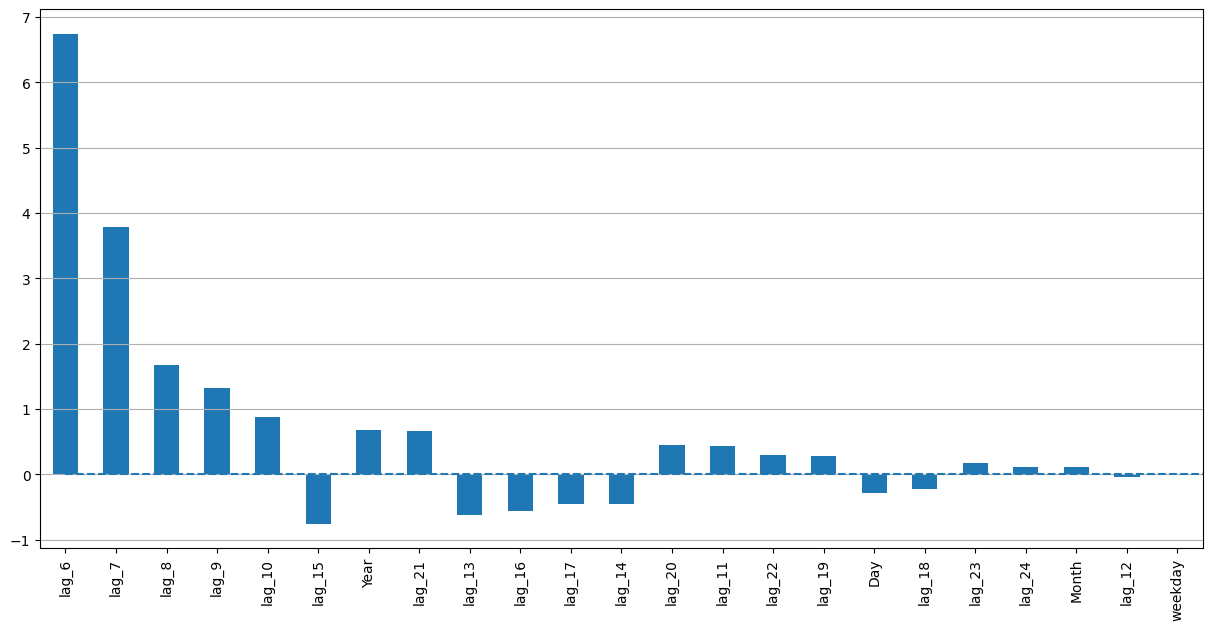

In [96]:
from sklearn.linear_model import LassoCV, RidgeCV

# Perform ridge regression using cross-validation to select the optimal regularization parameter
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

# Plot the model results, including prediction intervals and any detected anomalies
plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

# Display the coefficients of the features used in the model
plotCoefficients(ridge)


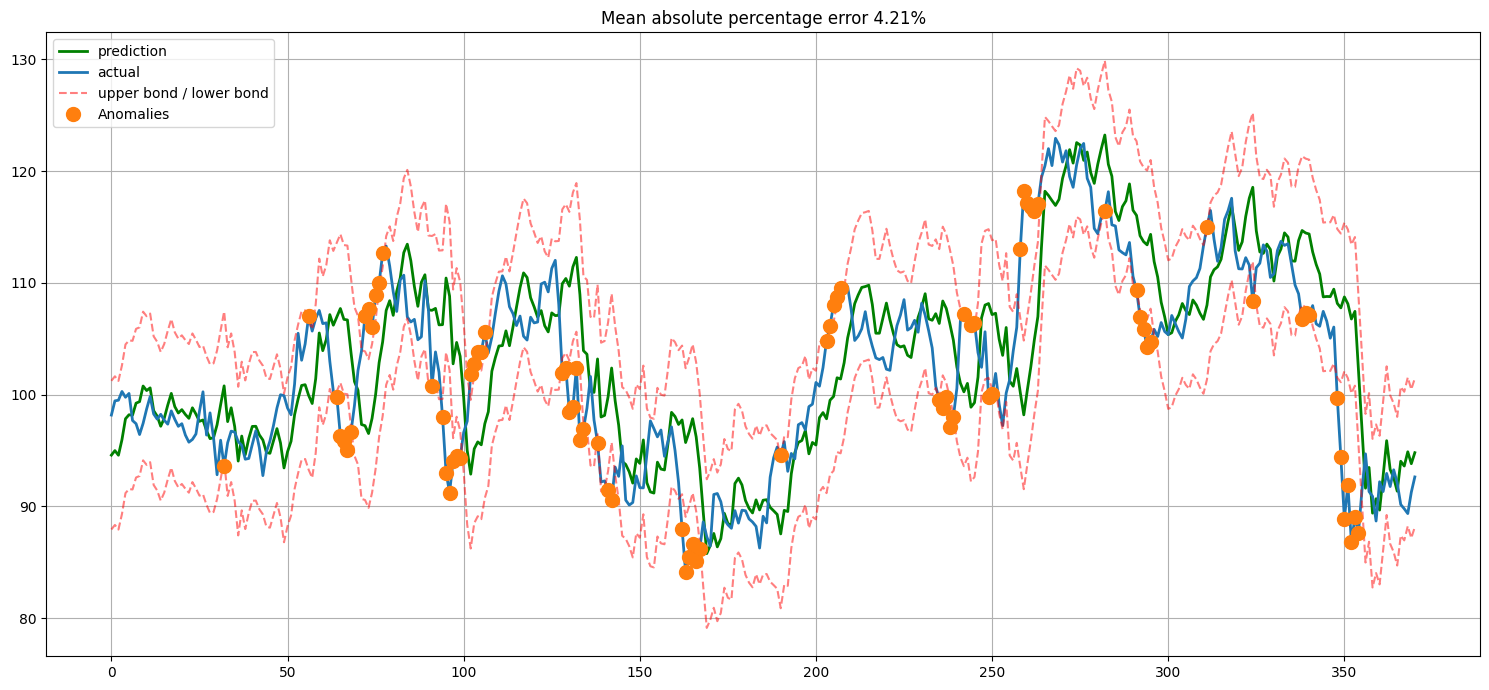

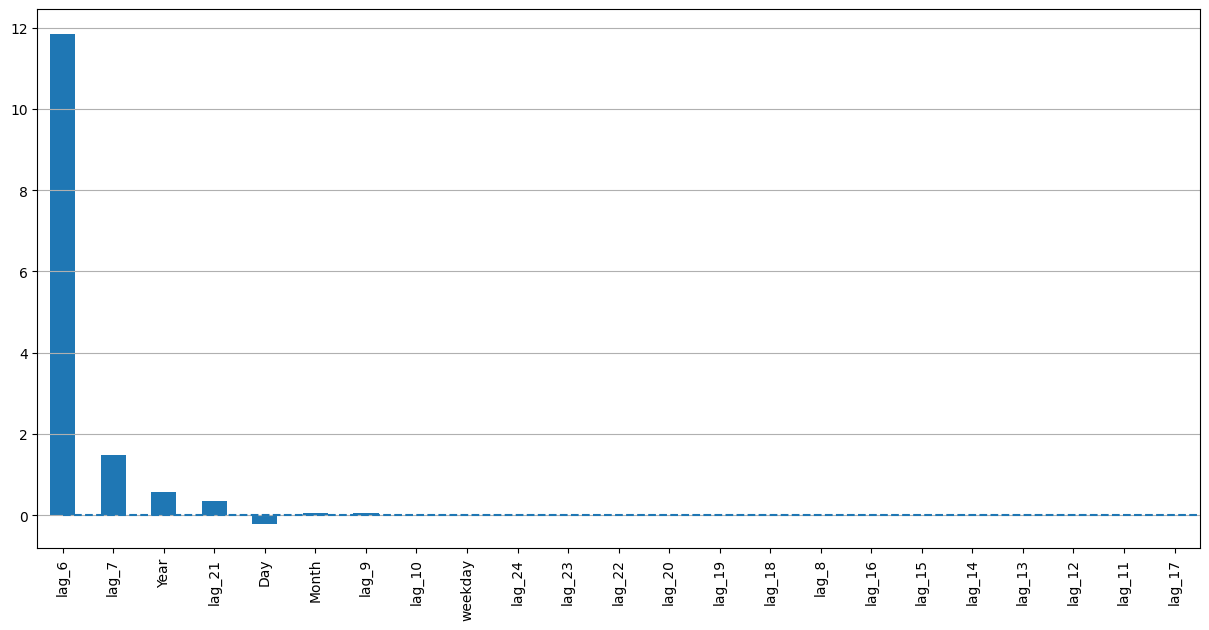

In [97]:
#Creating Lasso model with time-series cross-validation
lasso = LassoCV(cv=tscv)
#Fitting the scaled training data to Lasso model
lasso.fit(X_train_scaled, y_train)

#Plotting the Lasso model results on both train and test sets
plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
#Plotting the coefficients of the Lasso model
plotCoefficients(lasso)

In [98]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

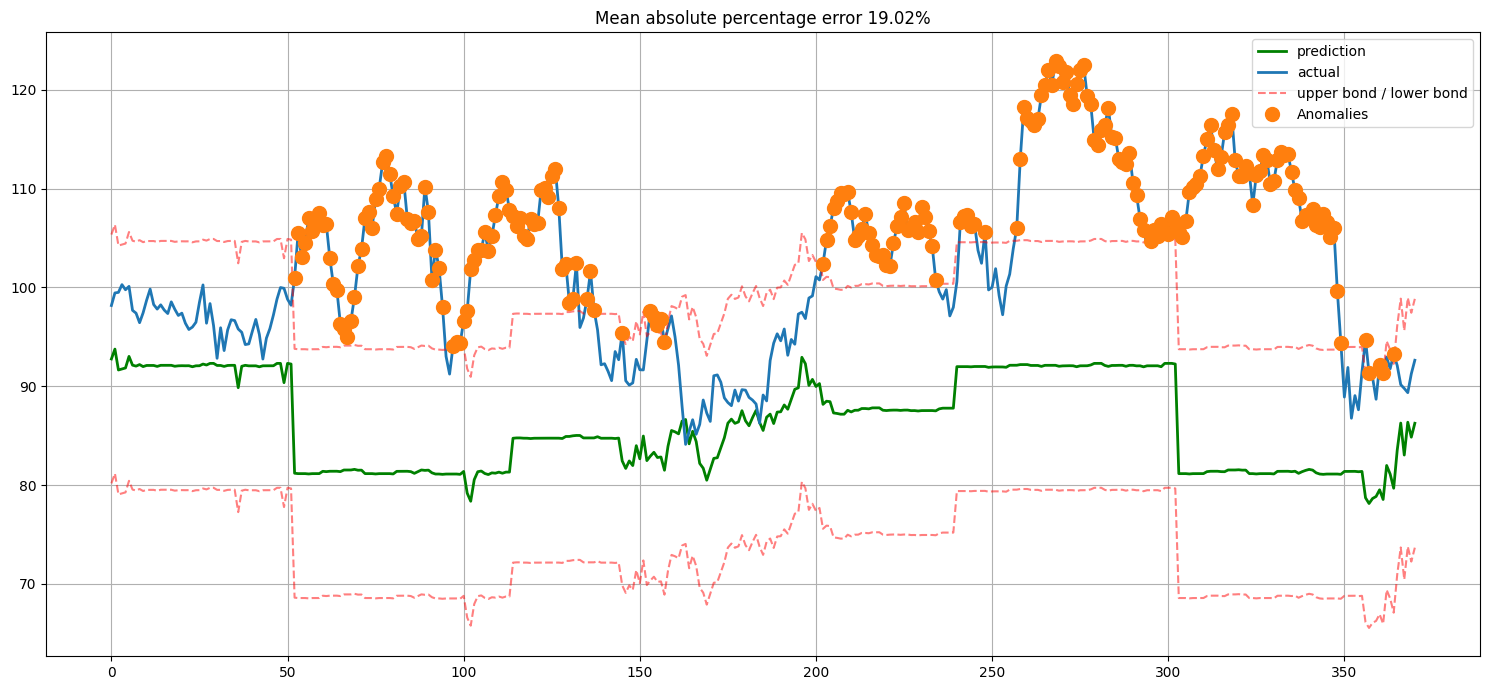

In [99]:
# plot the results of the XGBoost model
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [100]:
import sklearn.datasets
import sklearn.model_selection


# prepare the data using the prepareData function
X_train, X_test, y_train, y_test = prepareData(Adj_Close, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=42
)

In [101]:
import autosklearn.regression
import autosklearn.metrics

# Create and train the estimator 
estimator_askl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=1800,
    seed=42, 
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 3},
    n_jobs=2,
    metric=autosklearn.metrics.root_mean_squared_error,
)
# Auto-sklearn ingests the pandas dataframe and detects column types
estimator_askl.fit(X_train, y_train)



[WARNING] [2023-05-03 18:12:58,763:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 18:19:01,821:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 18:19:01,943:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     metric=root_mean_squared_error, n_jobs=2,
                     per_run_time_limit=360, resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 3}, seed=42,
                     time_left_for_this_task=1800)

In [102]:
import sklearn.metrics
# Score the model
prediction = estimator_askl.predict(X_test)

performance_askl = sklearn.metrics.mean_squared_error(y_test, prediction, squared=False)
print(f"Auto-Sklearn Classifier performance is {performance_askl}")

Auto-Sklearn Classifier performance is 1.6372626050567587


In [103]:
print(estimator_askl.sprint_statistics())

auto-sklearn results:
  Dataset name: a7f8a626-e9ff-11ed-8038-00155d7dccc4
  Metric: root_mean_squared_error
  Best validation score: 2.014931
  Number of target algorithm runs: 86
  Number of successful target algorithm runs: 42
  Number of crashed target algorithm runs: 35
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 1



In [104]:
def plotModelResults1(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True); 


[WARNING] [2023-05-03 18:43:02,356:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 18:43:02,867:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 19:12:59,887:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 19:42:59,483:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 20:13:02,326:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 20:13:02,895:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 20:43:00,149:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-03 20:43:00,698:Client-EnsembleBuilder] No runs were available to build an ensemble from


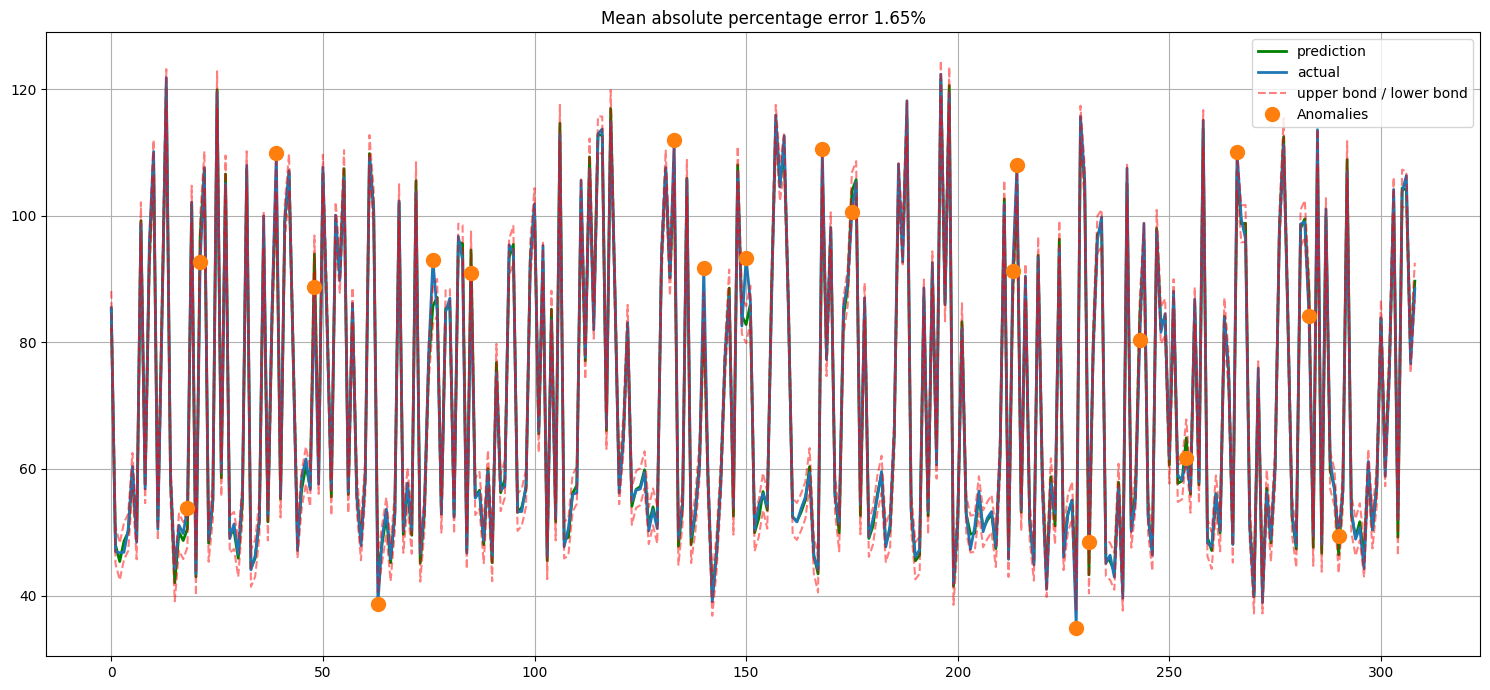

In [105]:
plotModelResults1(estimator_askl, 
                 X_train=X_train, 
                 X_test=X_test, 
                 plot_intervals=True, 
                 plot_anomalies=True)

In [106]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

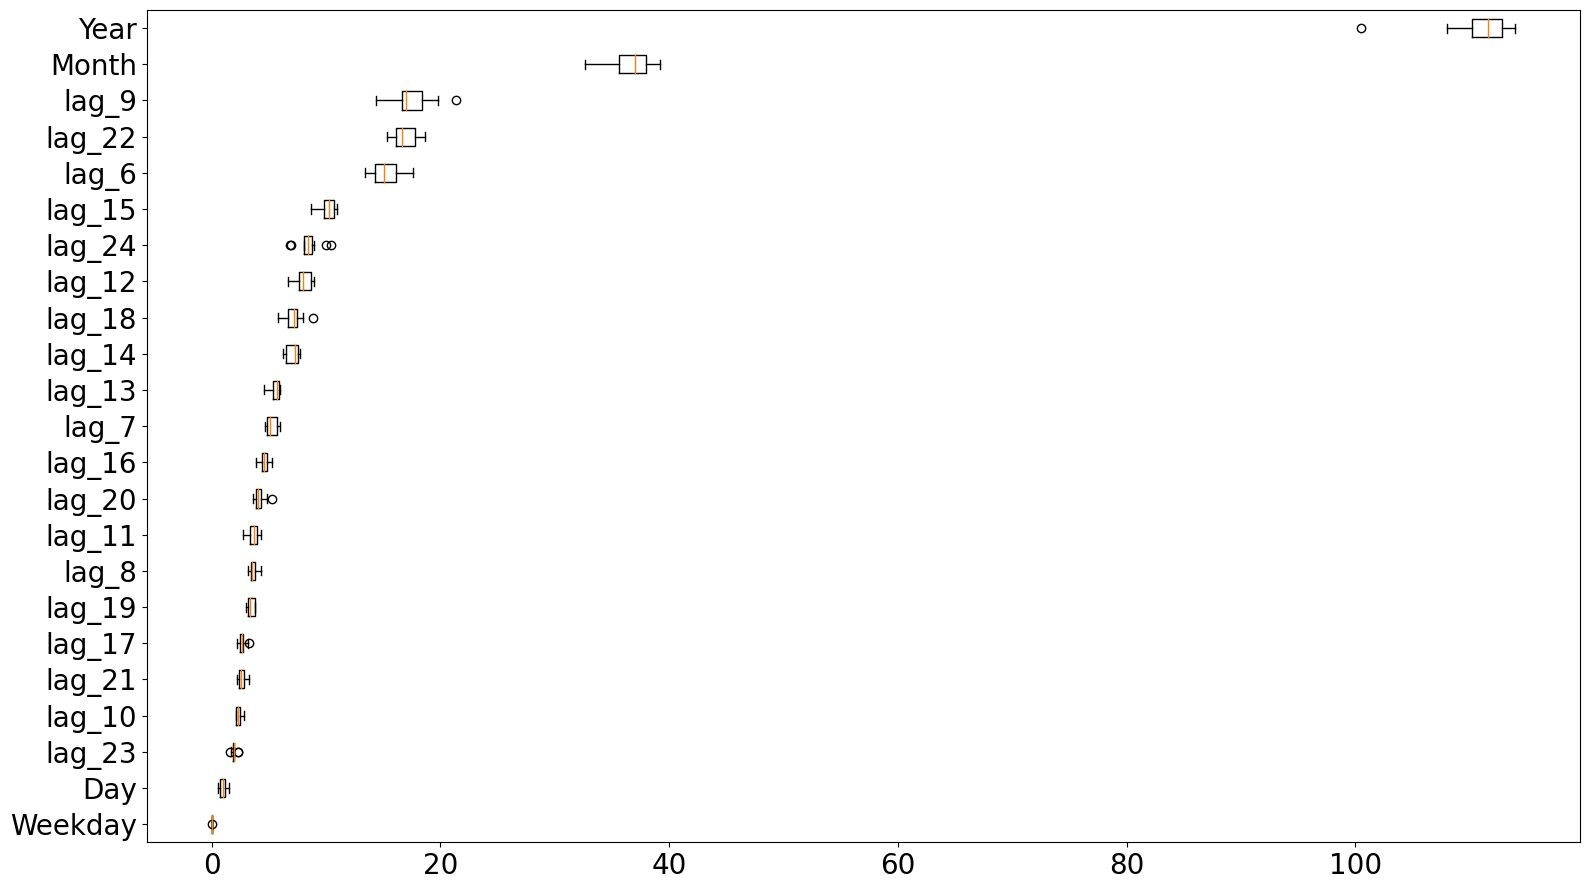

In [107]:
r = permutation_importance(
    estimator_askl, X_test, y_test,
    n_repeats=10, random_state=0, n_jobs=4,
    scoring='neg_mean_squared_error',
)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
sort_idx = r.importances_mean.argsort()
ax.boxplot(r.importances[sort_idx].T, labels=[X_test.columns[i] for i in sort_idx], vert=False)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(20)
fig.tight_layout()

# Conclusion

Based on the analysis of the project, it can be concluded that the Samira model and AutoSklearn were the best performers in predicting the adjusted close prices of the stock market. While other models were also evaluated, these two models outperformed the others in terms of accuracy and efficiency.

It is worth noting that there were various models utilized throughout the project, and some models were quicker to run, while others required more computational resources. Therefore, the selection of the appropriate model is dependent on the specific project requirements, including the available resources, time constraints, and the desired level of accuracy.

Regarding the adjusted close price trends, the data analysis showed that February was the highest month for adjusted close price. To identify any trends related to this observation, further investigation may be required. It is possible that February is a seasonally strong month for the stock market, or it could be influenced by external factors, such as news events or economic indicators. Therefore, it is recommended that the company conduct additional research to identify any underlying trends that may be driving the higher adjusted close prices in February.

In conclusion, the Samira model and AutoSklearn were the best performers in this project, and the selection of the appropriate model depends on specific project requirements. Additionally, further research is recommended to identify any underlying trends related to the higher adjusted close prices in February.